# Project no.2 - CIFAR10 Clustering

## Loading the data 

In [5]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


### Since we are going to performe clustering, then we do not need to split the data into train and test.
let's concatenate them 

In [6]:
X = np.concatenate((x_train, x_test), axis = 0)
Y = np.squeeze(np.concatenate((y_train, y_test), axis = 0))

print("shape of the X and Y, respectively:")
print(X.shape, Y.shape)

shape of the X and Y, respectively:
(60000, 32, 32, 3) (60000,)


### Based on the project instruction, we should pick only 3 classes fro CIFAR10 dataset (which include 10 classes)
So let's randomally select 3 classes: 2,5,7 which represents bird, dog, and horse.
Aditionally, changing the classes from 2,5,7 to 0,1,2, respectively.

In [114]:

X_c2 = X[Y == 2]
X_c5 = X[Y == 5]
X_c7 = X[Y == 7]

X3c_original = np.concatenate((X_c2, X_c5, X_c7), axis = 0) #stands for X of three classes
Y3c_original = np.array([0]*X_c2.shape[0] + [1]*X_c5.shape[0] + [2] * X_c7.shape[0])
Y3c = Y3c_original.copy()
X3c = X3c_original.copy()
print("Shape of X3c: ", X3c.shape, "\nShape of Y3c: ", len(Y3c))

Shape of X3c:  (18000, 32, 32, 3) 
Shape of Y3c:  18000


In [8]:
print("Let's check how many we have from each class:")
print("Class 0: ",X_c2.shape[0])
print("Class 1: ",X_c5.shape[0])
print("Class 2: ",X_c7.shape[0])
print("As we can see our data is balanced.")

Let's check how many we have from each class:
Class 0:  6000
Class 1:  6000
Class 2:  6000
As we can see our data is balanced.


### Let's look over some pictures from each class


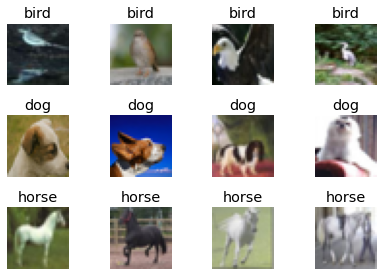

In [133]:
class_names = [ 'bird', 'dog', 'horse']

fig, axes = plt.subplots(3,4)
for i in range(3):
    X_class = X3c[Y3c == i]
    for j in range(4):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title(class_names[i])
        axes[i,j].axis('off')

fig.tight_layout()

## Clustering into 3 diffenret clusters:

### 1) Technique num.1:  without prepocessing over the images 

In order to apply clustering techniques over the data we should reshape our data into a vectors. Means, from (32,32,3) tensor into (32x32x3,1) vector (column vector of 3072 features) 

In [134]:
X3c_transformed = X3c.reshape(len(X3c),32*32*3)
print("New shape:", X3c_transformed.shape)

New shape: (18000, 3072)


Before we apply any kind of clustering technique, we should look what are the values we are dealing with at each dimention.


In [135]:
print("Max value for each dimention:", np.max(X3c_transformed, axis = 0))
print("Min value for each dimention: ", np.min(X3c_transformed, axis = 0))

Max value for each dimention: [255 255 255 ... 255 255 255]
Min value for each dimention:  [0 0 0 ... 0 0 0]


As we can see our values are in the range of 0-255. Since we are dealing with distances computation it is better to work on smaller values, then let's normalize our values to be in the range of 0 and 1.

In [136]:
max_vec =  np.max(X3c_transformed, axis = 0)
min_vec = np.min(X3c_transformed, axis = 0)
X3c_transformed_normelized = ((X3c_transformed -  min_vec)/ (max_vec - min_vec)) 
print("Max value of X3c_transformed_normelized: ", np.max(X3c_transformed_normelized))
print("Min value of X3c_transformed_normelized: ", np.min(X3c_transformed_normelized))


Max value of X3c_transformed_normelized:  1.0
Min value of X3c_transformed_normelized:  0.0


### 1.1) K-Means Method

In [61]:
from sklearn.cluster import KMeans

In [138]:
kmeans  = KMeans(n_clusters = 3,verbose = 1, max_iter=500, tol=0.000001)
# Train the model:
kmeans.fit(X3c_transformed_normelized) 

Initialization complete
Iteration 0, inertia 4105265.1100961277
Iteration 1, inertia 2700973.8953717803
Iteration 2, inertia 2588462.2892997554
Iteration 3, inertia 2564896.9403247596
Iteration 4, inertia 2554854.7139478074
Iteration 5, inertia 2548629.2700031227
Iteration 6, inertia 2544364.7473012297
Iteration 7, inertia 2541468.0990302265
Iteration 8, inertia 2539610.328178455
Iteration 9, inertia 2538459.8741776478
Iteration 10, inertia 2537691.277580665
Iteration 11, inertia 2537175.500703765
Iteration 12, inertia 2536851.701492009
Iteration 13, inertia 2536630.2772239614
Iteration 14, inertia 2536514.654263656
Iteration 15, inertia 2536450.090087545
Iteration 16, inertia 2536393.468745911
Iteration 17, inertia 2536350.8277489687
Iteration 18, inertia 2536323.9304961828
Iteration 19, inertia 2536309.495839597
Iteration 20, inertia 2536301.00948643
Iteration 21, inertia 2536295.6863539345
Iteration 22, inertia 2536291.6841779007
Iteration 23, inertia 2536287.6865953756
Iteration 24

Iteration 6, inertia 2547251.866099347
Iteration 7, inertia 2545814.8846315676
Iteration 8, inertia 2545010.308850426
Iteration 9, inertia 2544365.931379935
Iteration 10, inertia 2543919.8515354875
Iteration 11, inertia 2543527.867652304
Iteration 12, inertia 2543198.857464708
Iteration 13, inertia 2542896.65396543
Iteration 14, inertia 2542608.600553407
Iteration 15, inertia 2542349.3182769543
Iteration 16, inertia 2542113.8057804364
Iteration 17, inertia 2541880.540916694
Iteration 18, inertia 2541659.1938550207
Iteration 19, inertia 2541448.5059652054
Iteration 20, inertia 2541251.3693632735
Iteration 21, inertia 2541078.717902287
Iteration 22, inertia 2540929.9052937604
Iteration 23, inertia 2540769.5987567375
Iteration 24, inertia 2540607.307020483
Iteration 25, inertia 2540478.9359491044
Iteration 26, inertia 2540392.099647509
Iteration 27, inertia 2540283.5872049555
Iteration 28, inertia 2540188.1636824477
Iteration 29, inertia 2540093.502403234
Iteration 30, inertia 2540011.873

Iteration 102, inertia 2536366.2567620333
Iteration 103, inertia 2536364.772323605
Iteration 104, inertia 2536362.8537817732
Iteration 105, inertia 2536360.1223979495
Iteration 106, inertia 2536357.14873666
Iteration 107, inertia 2536354.1074495986
Iteration 108, inertia 2536350.168534864
Iteration 109, inertia 2536348.74079707
Iteration 110, inertia 2536347.4801980867
Iteration 111, inertia 2536346.255825099
Iteration 112, inertia 2536345.077462787
Iteration 113, inertia 2536343.5462511065
Iteration 114, inertia 2536342.824058891
Iteration 115, inertia 2536342.494655365
Iteration 116, inertia 2536342.181269655
Iteration 117, inertia 2536341.1721380884
Iteration 118, inertia 2536339.9945547134
Iteration 119, inertia 2536339.1643093294
Iteration 120, inertia 2536338.75880746
Iteration 121, inertia 2536338.315717587
Iteration 122, inertia 2536337.2359929946
Iteration 123, inertia 2536332.722645391
Iteration 124, inertia 2536324.954240209
Iteration 125, inertia 2536312.075731379
Iteration

Iteration 36, inertia 2538376.289412688
Iteration 37, inertia 2538307.9205660587
Iteration 38, inertia 2538220.271899082
Iteration 39, inertia 2538135.787895396
Iteration 40, inertia 2538063.6432584515
Iteration 41, inertia 2538002.4795516077
Iteration 42, inertia 2537944.850464826
Iteration 43, inertia 2537883.8866711576
Iteration 44, inertia 2537813.085213054
Iteration 45, inertia 2537714.475847077
Iteration 46, inertia 2537608.358984884
Iteration 47, inertia 2537505.484584534
Iteration 48, inertia 2537415.8060886264
Iteration 49, inertia 2537327.3225954776
Iteration 50, inertia 2537256.5582511066
Iteration 51, inertia 2537186.5896601905
Iteration 52, inertia 2537097.464371135
Iteration 53, inertia 2536997.753587899
Iteration 54, inertia 2536903.82807664
Iteration 55, inertia 2536830.0266951546
Iteration 56, inertia 2536765.349383797
Iteration 57, inertia 2536694.8789908662
Iteration 58, inertia 2536657.482622771
Iteration 59, inertia 2536624.5239768736
Iteration 60, inertia 2536602.

KMeans(max_iter=500, n_clusters=3, tol=1e-06, verbose=1)

Let's check the quality of KMeans clustering technique by checking its Silhouette score and Davies-Bounding index

In [60]:
from sklearn import metrics 

In [139]:

Y_clustered = kmeans.labels_

# Silhouette Score (The average of all the points)
#Close to 1 -> Good assignment of a point to its cluster
#Close to 0 -> Assignment of a point to the borderline of two clusters
#Close to -1 -> Bad assignment of a point to its cluster

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", metrics.silhouette_score(X3c_transformed_normelized, Y_clustered)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_clustered)) 


Silhouette Score (mean Silhouette Coefficient over all samples):  0.0886340368464252
Davies-Bounding index:  2.6310517601324572


#### Explanation:
Let's try to explain what was the main feature on which KMeans methods based its clustering.
In order to do that, let's check some images from each cluster. 

In [140]:
Y_clustered 

array([0, 2, 0, ..., 0, 0, 0])

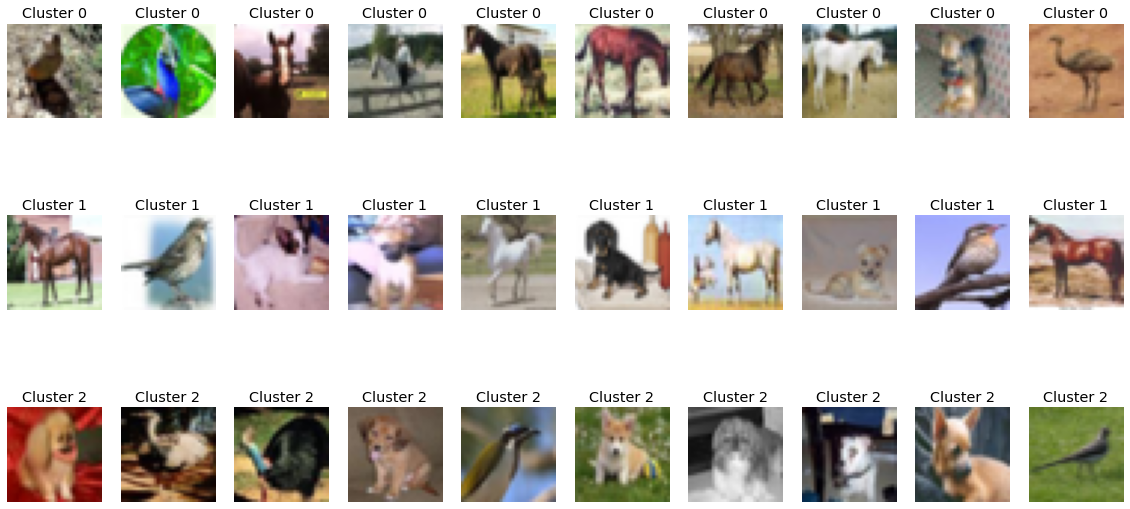

In [141]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_clustered  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

On the one hand, as it can be seen from the images above, it is hard to understand only by looking at what was the feature KMeans based on when it performed clustering. But on the other hand, one can claim that KMeans based its clustering on the image lightness. In order to check that, let's compare the average lightness of each cluster!

In [62]:
from skimage import io, color

In [142]:

lab0 = color.rgb2lab(X3c[Y_clustered == 0])
lab1 = color.rgb2lab(X3c[Y_clustered == 1])
lab2 = color.rgb2lab(X3c[Y_clustered == 2])

In [143]:
sum(Y_clustered == 2)

6766

In [144]:
print("Average lightness of cluster 0: ","Average Value: ",np.round(np.mean(lab0[:,:,:,0])),
      " Min Value: ", np.round(np.min(np.mean(lab0[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab0[:,:,:,0], axis = 0))),", Num of images in the set: ", len(lab0[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered==0]==0)," #Dog:" , sum(Y3c[Y_clustered==0]==1) , " #horse:", sum(Y3c[Y_clustered==0]==2),
"\nAverage lightness of cluster 1: ", "Average Value: ", np.round(np.mean(lab1[:,:,:,0])),
      " Min Value: " ,np.round(np.min(np.mean(lab1[:,:,:,0], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(lab1[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab1[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered==1]==0)," #Dog:" , sum(Y3c[Y_clustered==1]==1) , " #horse:", sum(Y3c[Y_clustered==1]==2),
"\nAverage lightness of cluster 2: ", "Average Value: " ,np.round(np.mean(lab2[:,:,:,0]))
      ," Min Value: ", np.round(np.min(np.mean(lab2[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab2[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab2[:,:,:,0]),
     "\n#Birds:" , sum(Y3c[Y_clustered==2]==0)," #Dog:" , sum(Y3c[Y_clustered==2]==1) , " #horse:", sum(Y3c[Y_clustered==2]==2))

Average lightness of cluster 0:  Average Value:  52.0  Min Value:  41.0 Max Value:  64.0 , Num of images in the set:  7650 
#Birds: 2440  #Dog: 2101  #horse: 3109 
Average lightness of cluster 1:  Average Value:  67.0  Min Value:  49.0 Max Value:  75.0 , Num of images in the set:  3584 
#Birds: 1469  #Dog: 1085  #horse: 1030 
Average lightness of cluster 2:  Average Value:  41.0  Min Value:  29.0 Max Value:  50.0 , Num of images in the set:  6766 
#Birds: 2091  #Dog: 2814  #horse: 1861


In [145]:
for i in range(3):
    birds = sum(Y3c[Y_clustered==i]==0)
    dogs = sum(Y3c[Y_clustered==i]==1)
    horses = sum(Y3c[Y_clustered ==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 31.9%, Dog - 27.5%, horse - 40.6%
Cluster 1: Birds - 41.0%, Dog - 30.3%, horse - 28.7%
Cluster 2: Birds - 30.9%, Dog - 41.6%, horse - 27.5%


As we can see, it is indeed possible that the clustering performed by Kmeans considers lightness as one of its main clustering features.

### 1.2) Hierarchical Clustering (HC) Method

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [146]:

hc = AgglomerativeClustering(n_clusters=3 ,affinity= 'euclidean') #Hierarchical Clustering

# Train the model:
hc.fit(X3c_transformed_normelized)


AgglomerativeClustering(n_clusters=3)

In [147]:
Y_hc = hc.labels_
print(np.unique(Y_hc))

[0 1 2]


#### Let's check the quality of Hierarchical Clustering technique by checking its Silhouette score and Davies-Bounding index

In [148]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_hc)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_hc)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.054540568002621324
Davies-Bounding index:  2.8100133362681476


#### Explanation:
Let's try to explain what was the main feature on which HC method based its clustering.
In order to do that, let's check some images from each cluster. 

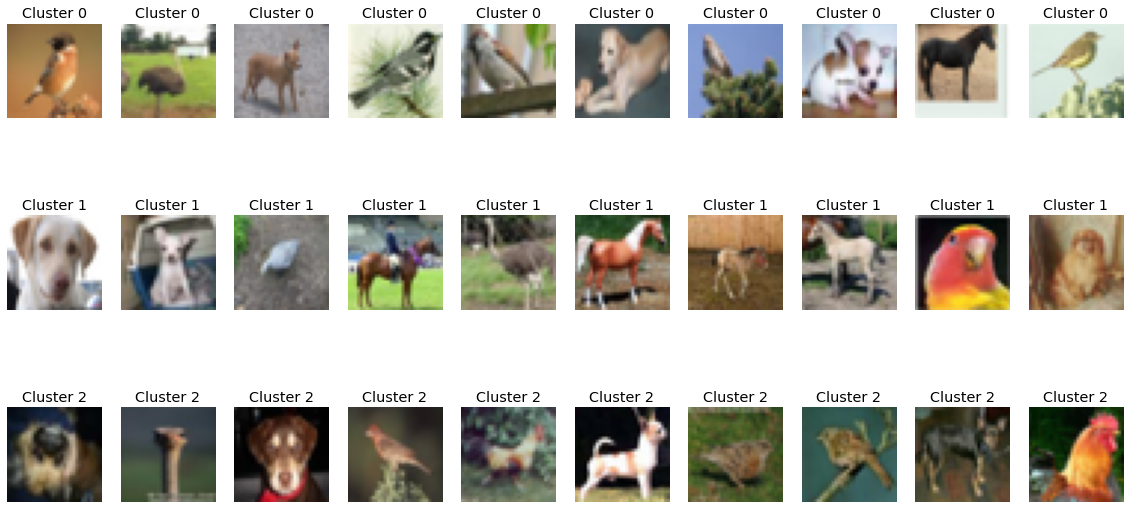

In [149]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_hc  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

Based on the images presented above, it is hard to tell which features HC method was based on when classifying the images into three separate classes. But, by looking over the brightness of the images we can see that they differ one from another. So in order to check that let's take a look over the average value of the image's brightness of each class.

In [64]:
def rgb2gray(rgbSet):
    images = []
    for i in range(len(rgbSet)):
        img = rgbSet[i,...]
        grayImage = rgb2gray_1(img)
        images.append(grayImage)
        
    return np.array(images)

def rgb2gray_1(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray



In [151]:
g0 = rgb2gray(X3c[Y_hc == 0])
g1 = rgb2gray(X3c[Y_hc == 1])
g2 = rgb2gray(X3c[Y_hc == 2])

In [152]:
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(g0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(g0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g0[:,:,:], axis = 0))),", Num of images in the set: ", len(g0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc==0]==0)," #Dog:" , sum(Y3c[Y_hc==0]==1) , " #horse:", sum(Y3c[Y_hc==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(g1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(g1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(g1[:,:,:], axis = 0))), ", Num of images in the set: ", len(g1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc==1]==0)," #Dog:" , sum(Y3c[Y_hc==1]==1) , " #horse:", sum(Y3c[Y_hc==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(g2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(g2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g2[:,:,:], axis = 0))), ", Num of images in the set: ", len(g2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_hc==2]==0)," #Dog:" , sum(Y3c[Y_hc==2]==1) , " #horse:", sum(Y3c[Y_hc==2]==2))

Average brightness of cluster 0:  Average Value:  142.0  Min Value:  102.0 Max Value:  177.0 , Num of images in the set:  7994 
#Birds: 2991  #Dog: 2024  #horse: 2979 
Average brightness of cluster 1:  Average Value:  114.0  Min Value:  92.0 Max Value:  127.0 , Num of images in the set:  7725 
#Birds: 2036  #Dog: 3192  #horse: 2497 
Average brightness of cluster 2:  Average Value:  78.0  Min Value:  57.0 Max Value:  108.0 , Num of images in the set:  2281 
#Birds: 973  #Dog: 784  #horse: 524


In [153]:
for i in range(3):
    birds = sum(Y3c[Y_hc==i]==0)
    dogs = sum(Y3c[Y_hc==i]==1)
    horses = sum(Y3c[Y_hc ==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 37.4%, Dog - 25.3%, horse - 37.3%
Cluster 1: Birds - 26.4%, Dog - 41.3%, horse - 32.3%
Cluster 2: Birds - 42.7%, Dog - 34.4%, horse - 23.0%


As we can see, it is indeed possible that the clustering performed by HC considers brightness as one of its main clustering features.

### 1.3) Gaussians Mixture (GM) Method 

In [65]:
from sklearn import mixture

In [154]:
gm = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)
# Train the model:
gm.fit(X3c_transformed_normelized)


Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


GaussianMixture(n_components=3, verbose=1)

In [155]:
# Use the model:
Y_gm = gm.predict(X3c_transformed_normelized)
print(np.unique(Y_gm))

[0 1 2]


Let's check the quality of Gaussians Mizture technique by checking its Silhouette score and Davies-Bounding index

In [156]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_gm)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_gm)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.07604922195102004
Davies-Bounding index:  2.8318413553098125


#### Explanation:
Let's try to explain what was the main feature on which GM method based its clustering.
In order to do that, let's check some images from each cluster. 

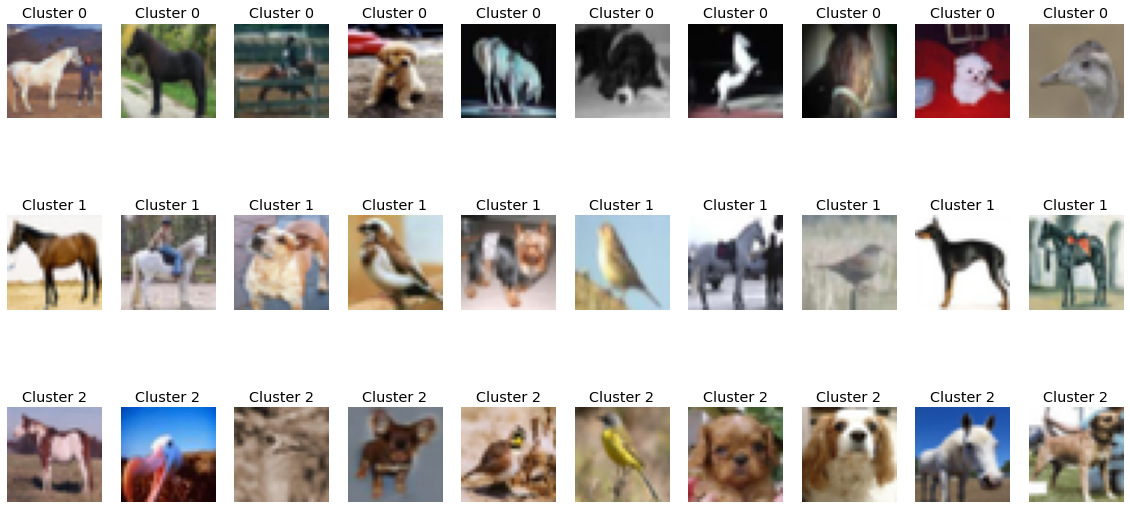

In [157]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_gm  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

Based on the images presented above, it is hard to tell which features GM method was based on when classifying the images into three separate classes. But, by looking over the brightness of the images we can see that they differ one from another. So in order to check that let's take a look over the average value of the image's brightness of each class.

In [158]:
gm0 = rgb2gray(X3c[Y_gm == 0])
gm1 = rgb2gray(X3c[Y_gm == 1])
gm2 = rgb2gray(X3c[Y_gm == 2])

In [159]:
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm==0]==0)," #Dog:" , sum(Y3c[Y_gm==0]==1) , " #horse:", sum(Y3c[Y_gm==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm==1]==0)," #Dog:" , sum(Y3c[Y_gm==1]==1) , " #horse:", sum(Y3c[Y_gm==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_gm==2]==0)," #Dog:" , sum(Y3c[Y_gm==2]==1) , " #horse:", sum(Y3c[Y_gm==2]==2))

Average brightness of cluster 0:  Average Value:  99.0  Min Value:  73.0 Max Value:  120.0 , Num of images in the set:  7266 
#Birds: 2366  #Dog: 2966  #horse: 1934 
Average brightness of cluster 1:  Average Value:  161.0  Min Value:  118.0 Max Value:  182.0 , Num of images in the set:  3708 
#Birds: 1527  #Dog: 1142  #horse: 1039 
Average brightness of cluster 2:  Average Value:  125.0  Min Value:  98.0 Max Value:  155.0 , Num of images in the set:  7026 
#Birds: 2107  #Dog: 1892  #horse: 3027


In [160]:
for i in range(3):
    birds = sum(Y3c[Y_gm==i]==0)
    dogs = sum(Y3c[Y_gm==i]==1)
    horses = sum(Y3c[Y_gm ==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 32.6%, Dog - 40.8%, horse - 26.6%
Cluster 1: Birds - 41.2%, Dog - 30.8%, horse - 28.0%
Cluster 2: Birds - 30.0%, Dog - 26.9%, horse - 43.1%


It indeed looks like image brightness has an impact on the image clustering procedure.

### Part 1 Results, Discussion and Conclusions:

#### Results:
1) KMeans - Silhouette Score (mean Silhouette Coefficient over all samples):  0.089, Davies-Bounding index:  2.63 - explained by lightness

Cluster 0: Birds - 31.9%, Dog - 27.5%, horse - 40.6%, (total images: 7650), Average lightness value: 52.0<br>
Cluster 1: Birds - 41.0%, Dog - 30.3%, horse - 28.7%, (total images: 3584), Average lightness value: 67.0<br>
Cluster 2: Birds - 30.9%, Dog - 41.6%, horse - 27.5%, (total images: 6766), Average lightness value: 41.0

2) HC - Silhouette Score (mean Silhouette Coefficient over all samples):  0.055, Davies-Bounding index:  2.81 - explained by brightness

Cluster 0: Birds - 37.4%, Dog - 25.3%, horse - 37.3%, (total images: 7994), Average brightness value: 142.0<br>
Cluster 1: Birds - 26.4%, Dog - 41.3%, horse - 32.3%, (total images: 7725), Average brightness value: 114.0<br>
Cluster 2: Birds - 42.7%, Dog - 34.4%, horse - 23.0%, (total images: 2281), Average brightness value: 78.0

3) GM - Silhouette Score (mean Silhouette Coefficient over all samples):  0.076, Davies-Bounding index:  2.83 - explained by brightness

Cluster 0: Birds - 32.6%, Dog - 40.8%, horse - 26.6%, (total images: 7266), Average brightness value: 99.0<br>
Cluster 1: Birds - 41.2%, Dog - 30.8%, horse - 28.0%, (total images: 3708), Average brightness value: 161.0<br>
Cluster 2: Birds - 30.0%, Dog - 26.9%, horse - 43.1%, (total images: 7026), Average brightness value: 125.0


#### Discussion:
By looking over the results of all three clustering methods in a visual way, we can see that the clustering methods did not cluster the images based on the animal presented. Additionally, it was shown that lightness and brightness were played as major features during the clustering procedure of all three methods. The Silhouette coefficient of all three examined clustering methods was found to have the same order magnitude of 0.01, which means that the clusters are indifferent, or we can say that the distance between clusters is not significant. Davies-Bounding index, based on euclidian distance in our calculation, presents values in order of magnitude of units, around 3, which means that all three methods yield more or less the same similarity measure of each cluster with its most similar cluster. Moreover, all three methods show the main partition into two main clusters, which hold around 84% of the samples.

#### Conclusions:
We can conclude that without dimensionality reduction/pre-processing image clustering will tend to cluster based on image properties and not on the object inside the image. Additionally, based on the metric values presented above, it can be concluded that there is no preferred clustering technique in our examination scenario.

### 2) Technique num.2: with preprocessing based on Clustering combined with Dimentionality reduction  

#### 2.1) PCA followed by all three clusstering methods 


First, let's check how many dimentions we need to cover 90% of the data information 

In [161]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X3c_transformed_normelized)
Eigenvalues = pca.singular_values_

cum_sum = 0
cum_sum_info = []
Index = 0
total_sum = np.sum(Eigenvalues)
for i in range(len(Eigenvalues)):
    cum_sum += Eigenvalues[i]
    cum_sum_info.append(cum_sum/total_sum * 100)
    if cum_sum/total_sum >= 0.90 and Index == 0:
        Index = i
        print("Num of features to cover %.2f %%  of the data information is %i, out of %i possible features, which is  %.2f %% of the possible features!"
              %(cum_sum/total_sum*100,Index, len(Eigenvalues), Index/len(Eigenvalues)*100) )
    


Num of features to cover 90.01 %  of the data information is 1101, out of 3072 possible features, which is  35.84 % of the possible features!


The black point presents the required number of dimensions to ensure at least 90% of data information. This means we can present 90% of the information by using only 1101 dimensions in comparison to the original image dimension, which is 3072. 


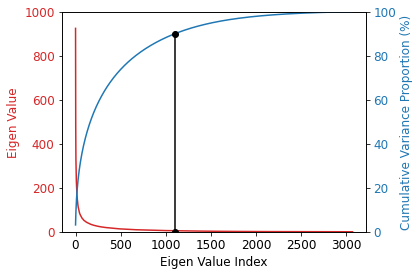

In [162]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 12})
t = np.arange(len(Eigenvalues))
data1 = Eigenvalues
data2 = cum_sum_info

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Eigen Value Index')
ax1.set_ylabel('Eigen Value', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,1000])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative Variance Proportion (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot([Index,Index], [0,90], '-ok')
ax2.set_ylim([0,100])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
print("The black point presents the required number of dimensions to ensure at least 90%% of data information. This means we can present 90%% of the information by using only %d dimensions in comparison to the original image dimension, which is %d. "
      %(Index,len(Eigenvalues))) 

Now, before we continue to examine what dimensionality reduction will do to all three clustering methods.
let's take a look over the two main dimensions of the data (based on $V_{1}$ and $V_{2}$, where $V_{i}$'s are the eigenvectors of the highest eigenvalues). The mathematical equation can be written as 
$$X_{proj} = Proj_{x}{V}$$
where 
$$V = [\vec{V}_{1}, \vec{V}_{2}] \ | \  \vec{V_i} \in \mathbb{R}^{3072}$$ s.t $$\lambda_{1} \geq \lambda_{2} \geq ... \geq \lambda_{3072}$$
and 
$$x = [x_1, ..., x_{3072}]$$


In [163]:

V = pca.components_[:2,:]
X_proj = np.matmul(X3c_transformed_normelized, V.T)
print(np.shape(X_proj))


(18000, 2)


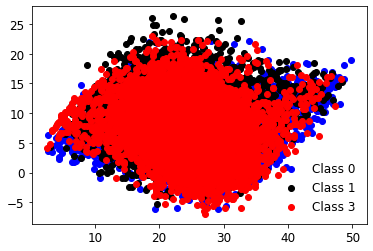

In [164]:

plt.scatter(X_proj[Y3c==0][:,0], X_proj[Y3c==0][:,1], color = 'b' , label = 'Class 0')
plt.scatter(X_proj[Y3c==1][:,0], X_proj[Y3c==1][:,1], color = 'k', label= 'Class 1' )
plt.scatter(X_proj[Y3c==2][:,0], X_proj[Y3c==2][:,1], color = 'r' ,label = 'Class 3')
plt.legend(frameon = False)

As we can see all three classes were placed in the same area, which means that same as before, it is more likely that the clustering methods will cluster the data based on the image properties (e.g., brightness, and lightness) and not based on the object in the image (the animal kind).

#### 2.1) PCA followed by all three clusstering methods 

In [165]:
# let's project the data over 1101 dimensions (covering 90% of the data information)
X3c_transformed_normelized_projected = np.matmul(X3c_transformed_normelized,pca.components_[:1101,:].T )
print("Shape of Xproj:", np.shape(X3c_transformed_normelized_projected))

Shape of Xproj: (18000, 1101)


#### 2.1.1) K-Means Method + PCA

In [166]:
kmeansPca  = KMeans(n_clusters = 3,verbose = 1, max_iter=500, tol=0.000001)
# Train the model:
kmeansPca.fit(X3c_transformed_normelized_projected) 

Initialization complete
Iteration 0, inertia 4330177.928040159
Iteration 1, inertia 2649328.3369392315
Iteration 2, inertia 2549975.2416221816
Iteration 3, inertia 2542251.1118143834
Iteration 4, inertia 2538150.511265935
Iteration 5, inertia 2535449.4268767964
Iteration 6, inertia 2533509.4723375207
Iteration 7, inertia 2532083.556926128
Iteration 8, inertia 2531257.476334347
Iteration 9, inertia 2530733.2731007147
Iteration 10, inertia 2530349.9404841736
Iteration 11, inertia 2529999.1810274543
Iteration 12, inertia 2529731.9803419923
Iteration 13, inertia 2529543.5220348914
Iteration 14, inertia 2529371.7058201446
Iteration 15, inertia 2529220.0293390765
Iteration 16, inertia 2529118.003833574
Iteration 17, inertia 2529040.0920273396
Iteration 18, inertia 2528966.057628369
Iteration 19, inertia 2528911.5854584635
Iteration 20, inertia 2528880.0913883746
Iteration 21, inertia 2528857.0792945605
Iteration 22, inertia 2528837.1698614014
Iteration 23, inertia 2528825.8307193853
Iteratio

Iteration 19, inertia 2528825.8985578353
Iteration 20, inertia 2528820.627560358
Iteration 21, inertia 2528816.3768394543
Iteration 22, inertia 2528814.9763093987
Iteration 23, inertia 2528813.9515791615
Iteration 24, inertia 2528813.3313532188
Iteration 25, inertia 2528812.5572065786
Iteration 26, inertia 2528811.8096298766
Iteration 27, inertia 2528811.5682258373
Iteration 28, inertia 2528811.4655208513
Iteration 29, inertia 2528811.379873192
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 4238520.2252663355
Iteration 1, inertia 2766431.090187717
Iteration 2, inertia 2639644.1825821074
Iteration 3, inertia 2596309.4784055483
Iteration 4, inertia 2579572.16288759
Iteration 5, inertia 2571400.2632936668
Iteration 6, inertia 2564767.141432384
Iteration 7, inertia 2557941.427258393
Iteration 8, inertia 2550911.442027104
Iteration 9, inertia 2545200.3736079806
Iteration 10, inertia 2540819.890723391
Iteration 11, inertia 2537401.3540202617
Itera

Iteration 50, inertia 2532265.7823937633
Iteration 51, inertia 2532182.8646988734
Iteration 52, inertia 2532093.3942750655
Iteration 53, inertia 2531993.2793473727
Iteration 54, inertia 2531873.073574116
Iteration 55, inertia 2531718.969197979
Iteration 56, inertia 2531560.5391296316
Iteration 57, inertia 2531433.6535380133
Iteration 58, inertia 2531313.8830155907
Iteration 59, inertia 2531213.1144812703
Iteration 60, inertia 2531120.6654393966
Iteration 61, inertia 2531029.4113679877
Iteration 62, inertia 2530936.8317319644
Iteration 63, inertia 2530874.183935276
Iteration 64, inertia 2530793.7498697042
Iteration 65, inertia 2530701.118837044
Iteration 66, inertia 2530619.895291287
Iteration 67, inertia 2530553.9479985875
Iteration 68, inertia 2530500.276626944
Iteration 69, inertia 2530438.700594569
Iteration 70, inertia 2530375.617786117
Iteration 71, inertia 2530294.806164666
Iteration 72, inertia 2530191.0294813192
Iteration 73, inertia 2530089.0206926363
Iteration 74, inertia 252

KMeans(max_iter=500, n_clusters=3, tol=1e-06, verbose=1)

Let's check the quality of PCA $\rightarrow$ KMeans clustering technique by checking its Silhouette score and Davies-Bounding index

In [167]:

Y_clustered_pca = kmeansPca.labels_

# Silhouette Score (The average of all the points)
#Close to 1 -> Good assignment of a point to its cluster
#Close to 0 -> Assignment of a point to the borderline of two clusters
#Close to -1 -> Bad assignment of a point to its cluster

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", metrics.silhouette_score(X3c_transformed_normelized_projected, Y_clustered_pca)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized_projected, Y_clustered_pca)) 


Silhouette Score (mean Silhouette Coefficient over all samples):  0.0888613857475788
Davies-Bounding index:  2.6267264196088242


#### Explanation:
Let's try to explain what was the main feature on which KMeans methods based its clustering.
In order to do that, let's check some images from each cluster. 

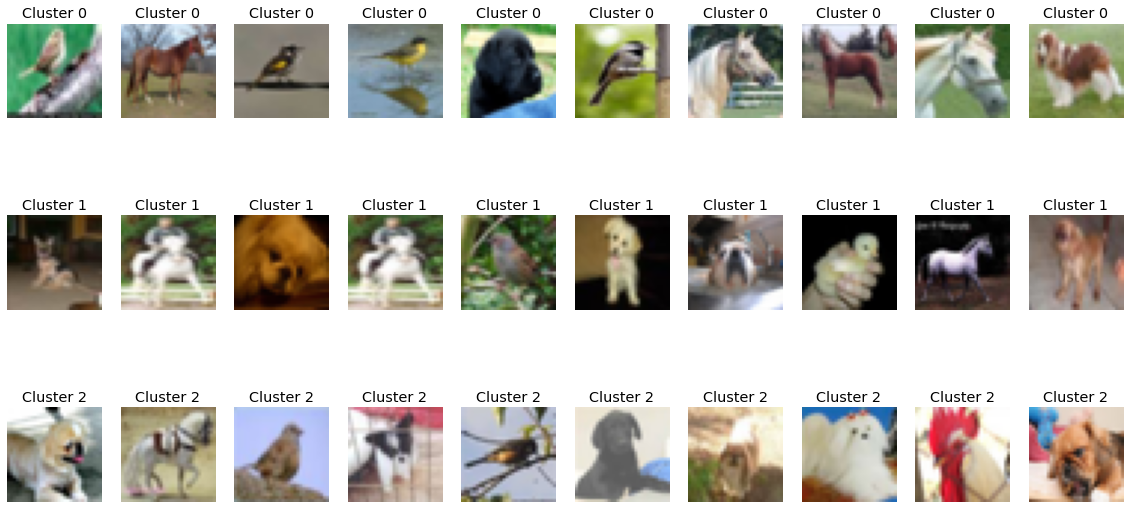

In [168]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_clustered_pca  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [169]:
from skimage import io, color
lab0 = color.rgb2lab(X3c[Y_clustered_pca == 0])
lab1 = color.rgb2lab(X3c[Y_clustered_pca == 1])
lab2 = color.rgb2lab(X3c[Y_clustered_pca == 2])

In [170]:
print("Average lightness of cluster 0: ","Average Value: ",np.round(np.mean(lab0[:,:,:,0])),
      " Min Value: ", np.round(np.min(np.mean(lab0[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab0[:,:,:,0], axis = 0))),", Num of images in the set: ", len(lab0[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_pca==0]==0)," #Dog:" , sum(Y3c[Y_clustered_pca==0]==1) , " #horse:", sum(Y3c[Y_clustered_pca==0]==2),
"\nAverage lightness of cluster 1: ", "Average Value: ", np.round(np.mean(lab1[:,:,:,0])),
      " Min Value: " ,np.round(np.min(np.mean(lab1[:,:,:,0], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(lab1[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab1[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_pca==1]==0)," #Dog:" , sum(Y3c[Y_clustered_pca==1]==1) , " #horse:", sum(Y3c[Y_clustered_pca==1]==2),
"\nAverage lightness of cluster 2: ", "Average Value: " ,np.round(np.mean(lab2[:,:,:,0]))
      ," Min Value: ", np.round(np.min(np.mean(lab2[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab2[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab2[:,:,:,0]),
     "\n#Birds:" , sum(Y3c[Y_clustered_pca==2]==0)," #Dog:" , sum(Y3c[Y_clustered_pca==2]==1) , " #horse:", sum(Y3c[Y_clustered_pca==2]==2))

Average lightness of cluster 0:  Average Value:  52.0  Min Value:  41.0 Max Value:  64.0 , Num of images in the set:  7650 
#Birds: 2440  #Dog: 2101  #horse: 3109 
Average lightness of cluster 1:  Average Value:  41.0  Min Value:  29.0 Max Value:  50.0 , Num of images in the set:  6766 
#Birds: 2091  #Dog: 2814  #horse: 1861 
Average lightness of cluster 2:  Average Value:  67.0  Min Value:  49.0 Max Value:  75.0 , Num of images in the set:  3584 
#Birds: 1469  #Dog: 1085  #horse: 1030


In [171]:
for i in range(3):
    birds = sum(Y3c[Y_clustered_pca==i]==0)
    dogs = sum(Y3c[Y_clustered_pca ==i]==1)
    horses = sum(Y3c[Y_clustered_pca ==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 31.9%, Dog - 27.5%, horse - 40.6%
Cluster 1: Birds - 30.9%, Dog - 41.6%, horse - 27.5%
Cluster 2: Birds - 41.0%, Dog - 30.3%, horse - 28.7%


Except for the fact that the examination of Kmeans algorithm was faster, nothing has changed dramatically.

#### 2.1.1) Hierarchical Clustering (HC) Method + PCA

In [172]:
hcPca = AgglomerativeClustering(n_clusters=3 ,affinity= 'euclidean') #Hierarchical Clustering

# Train the model:
hcPca.fit(X3c_transformed_normelized_projected)
Y_hc_Pca = hcPca.labels_
print(np.unique(Y_hc_Pca))


[0 1 2]


Let's check the quality of Hierarchical Clustering technique by checking its Silhouette score and Davies-Bounding index

In [173]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_hc_Pca)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_hc_Pca)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.057864610188002805
Davies-Bounding index:  2.8268073193751566


#### Explanation:
Let's try to explain what was the main feature on which PCA$\rightarrow$HC method based its clustering.
In order to do that, let's check some images from each cluster. 

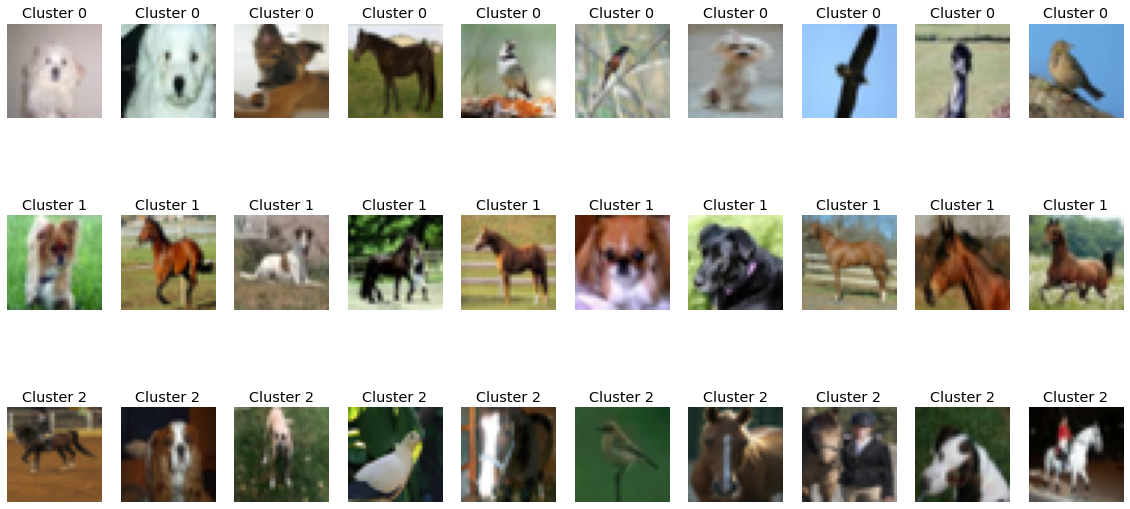

In [174]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_hc_Pca  == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

In [175]:
g0 = rgb2gray(X3c[ Y_hc_Pca == 0])
g1 = rgb2gray(X3c[ Y_hc_Pca == 1])
g2 = rgb2gray(X3c[ Y_hc_Pca == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(g0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(g0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g0[:,:,:], axis = 0))),", Num of images in the set: ", len(g0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Pca==0]==0)," #Dog:" , sum(Y3c[Y_hc_Pca==0]==1) , " #horse:", sum(Y3c[Y_hc_Pca==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(g1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(g1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(g1[:,:,:], axis = 0))), ", Num of images in the set: ", len(g1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Pca==1]==0)," #Dog:" , sum(Y3c[Y_hc_Pca==1]==1) , " #horse:", sum(Y3c[Y_hc_Pca==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(g2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(g2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g2[:,:,:], axis = 0))), ", Num of images in the set: ", len(g2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_hc_Pca==2]==0)," #Dog:" , sum(Y3c[Y_hc_Pca==2]==1) , " #horse:", sum(Y3c[Y_hc_Pca==2]==2))

Average brightness of cluster 0:  Average Value:  145.0  Min Value:  107.0 Max Value:  183.0 , Num of images in the set:  6661 
#Birds: 2358  #Dog: 1737  #horse: 2566 
Average brightness of cluster 1:  Average Value:  118.0  Min Value:  101.0 Max Value:  132.0 , Num of images in the set:  8258 
#Birds: 2406  #Dog: 3171  #horse: 2681 
Average brightness of cluster 2:  Average Value:  82.0  Min Value:  63.0 Max Value:  110.0 , Num of images in the set:  3081 
#Birds: 1236  #Dog: 1092  #horse: 753


In [176]:
for i in range(3):
    birds = sum(Y3c[Y_hc_Pca ==i]==0)
    dogs = sum(Y3c[Y_hc_Pca ==i]==1)
    horses = sum(Y3c[Y_hc_Pca ==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 35.4%, Dog - 26.1%, horse - 38.5%
Cluster 1: Birds - 29.1%, Dog - 38.4%, horse - 32.5%
Cluster 2: Birds - 40.1%, Dog - 35.4%, horse - 24.4%


Except for the fact that the examination of HC algorithm was faster due smaller data dimension, nothing has changed dramatically.

#### 2.1.3) Gaussians Mixture (GM) Method  + PCA

In [177]:

gmPca = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)

gmPca.fit(X3c_transformed_normelized_projected)




Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
Initialization converged: True


GaussianMixture(n_components=3, verbose=1)

In [178]:
Y_gmPca = gmPca.predict(X3c_transformed_normelized_projected)
print(np.unique(Y_gmPca))

[0 1 2]


Let's check the quality of PCA $\rightarrow$ GM technique by checking its Silhouette score and Davies-Bounding index

In [179]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_transformed_normelized,Y_gmPca)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_transformed_normelized, Y_gmPca)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.020988951139716855
Davies-Bounding index:  5.255156871129357


#### Explanation:
Let's try to explain what was the main feature on which GM method based its clustering.
In order to do that, let's check some images from each cluster. 

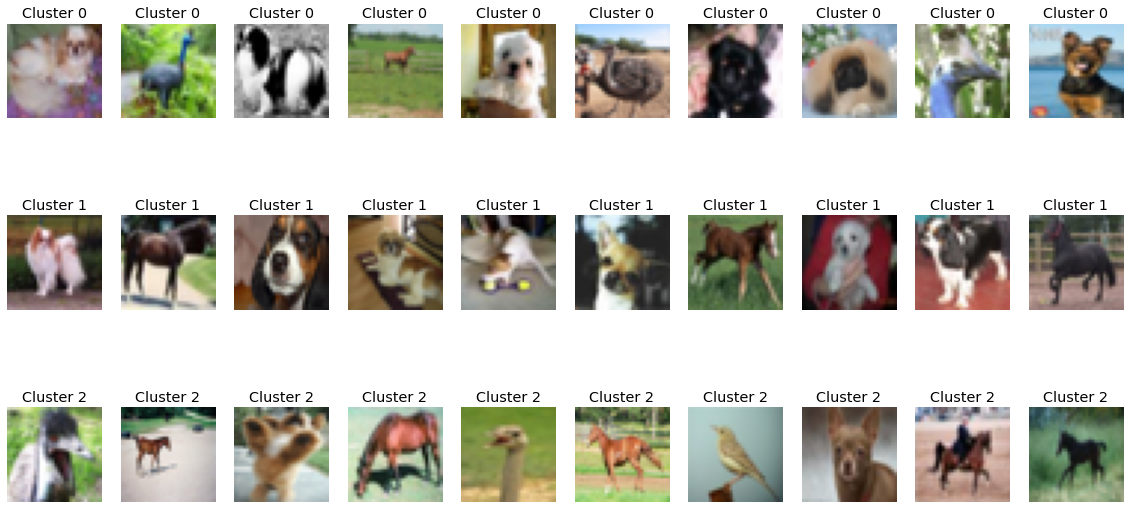

In [180]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c[Y_gmPca == i]
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

In [181]:
gm0 = rgb2gray(X3c[Y_gmPca == 0])
gm1 = rgb2gray(X3c[Y_gmPca == 1])
gm2 = rgb2gray(X3c[Y_gmPca == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gmPca==0]==0)," #Dog:" , sum(Y3c[Y_gmPca==0]==1) , " #horse:", sum(Y3c[Y_gmPca==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gmPca==1]==0)," #Dog:" , sum(Y3c[Y_gmPca==1]==1) , " #horse:", sum(Y3c[Y_gmPca==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_gmPca==2]==0)," #Dog:" , sum(Y3c[Y_gmPca==2]==1) , " #horse:", sum(Y3c[Y_gmPca==2]==2))

Average brightness of cluster 0:  Average Value:  124.0  Min Value:  95.0 Max Value:  159.0 , Num of images in the set:  5341 
#Birds: 1262  #Dog: 1375  #horse: 2704 
Average brightness of cluster 1:  Average Value:  102.0  Min Value:  76.0 Max Value:  122.0 , Num of images in the set:  5690 
#Birds: 1703  #Dog: 2231  #horse: 1756 
Average brightness of cluster 2:  Average Value:  136.0  Min Value:  115.0 Max Value:  146.0 , Num of images in the set:  6969 
#Birds: 3035  #Dog: 2394  #horse: 1540


In [182]:
for i in range(3):
    birds = sum(Y3c[Y_gmPca ==i]==0)
    dogs = sum(Y3c[Y_gmPca ==i]==1)
    horses = sum(Y3c[Y_gmPca ==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 23.6%, Dog - 25.7%, horse - 50.6%
Cluster 1: Birds - 29.9%, Dog - 39.2%, horse - 30.9%
Cluster 2: Birds - 43.6%, Dog - 34.4%, horse - 22.1%


Same as previous results of using PCA, GM+PCA does not provide different results compared to GM without PCA.

#### 2.2) Auto-Encoder followed by all three clusstering methods 

The main motivation for using AutoEncoder is to provide dimensionality reduction in a sophisticated manner. Based on the idea behind the autoencoder, the features, after encoding, should provide details about the object in the image. In other words, the autoencoder followed by the clustering method should provide clustering based on the object presented in the image (bird, horse, and dog) and not on image specifications like brightness, contrast, and so on.

In [161]:
import tensorflow as tf 

In [162]:
# building the encoder model 
Y3c = Y3c_original.copy()
X3c = X3c_original.copy()

X3c_normelized = 2 * (X3c / 255.0) - 1 ## normelized the data to -1 .... +1 , shape (None, 32,32,3)

inputs_encoder = tf.keras.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(16, (3,3), strides=(2, 2), padding='SAME',activation=tf.nn.relu)(inputs_encoder) # 32x32x3 --> 16x16x16
x = tf.keras.layers.Conv2D(32, (3,3), strides=(2, 2), padding='SAME',activation=tf.nn.relu)(x) # 16x16x16 --> 8x8x32
x = tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='SAME',activation=tf.nn.relu)(x) # 8 x 8 x 32 --> 4x4x64
x = tf.keras.layers.Flatten()(x)
x_encoded = tf.keras.layers.Dense(512)(x)#512

encoder = tf.keras.models.Model(inputs_encoder, x_encoded)
## Decoder



In [163]:
encoder.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
Total params: 548,384
Trainable params: 548,384
Non-trainable params: 0
____________________________________________________

In [164]:
layers = [0]*5
layers[0] = x = tf.keras.layers.Dense(1024)
layers[1]  = tf.keras.layers.Reshape(target_shape = (4,4,64))
layers[2]  = tf.keras.layers.Conv2DTranspose(32, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)
layers[3] = tf.keras.layers.Conv2DTranspose(16, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.relu)
layers[4] = tf.keras.layers.Conv2DTranspose(3, kernel_size=(3,3),strides=(2,2), padding = 'SAME', activation = tf.nn.tanh)

inputs_decoder = tf.keras.Input(shape = (512))# 512
x = layers[0](inputs_decoder)
x = layers[1](x)
x = layers[2](x)
x = layers[3](x)
prediction = layers[4](x)

decoder = tf.keras.Model(inputs = inputs_decoder, outputs = prediction)



In [165]:
decoder.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 512)]             0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
reshape_6 (Reshape)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_transpose_18 (Conv2DT (None, 8, 8, 32)          18464     
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 16, 16, 16)        4624      
_________________________________________________________________
conv2d_transpose_20 (Conv2DT (None, 32, 32, 3)         435       
Total params: 548,835
Trainable params: 548,835
Non-trainable params: 0
____________________________________________________

In [166]:
## The Autoencoder


x = layers[0](x_encoded)
x = layers[1](x)
x = layers[2](x)
x = layers[3](x)
Y_hat = layers[4](x)

autoencoder = tf.keras.Model(inputs =inputs_encoder, outputs = Y_hat)


In [167]:
autoencoder.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525

In [168]:

# The training will be applied on the full (autoencoder) model only:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
autoencoder.compile(optimizer = optimizer, loss = 'MSE')#'binary_crossentropy')

In [169]:
from sklearn.utils import shuffle
n = int(len(X3c_normelized) * 0.8)
X3c_normelized, Y3c = shuffle(X3c_normelized, Y3c)
x_train = X3c_normelized[:n,...]
x_test = X3c_normelized[n:,...]
history = autoencoder.fit(x_train, x_train,
                epochs=150, 
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 14400 samples, validate on 3600 samples
Epoch 1/150
14400/14400 [==============================] - 3s 205us/sample - loss: 0.1249 - val_loss: 0.0652
Epoch 2/150
14400/14400 [==============================] - 2s 120us/sample - loss: 0.0561 - val_loss: 0.0496
Epoch 3/150
14400/14400 [==============================] - 2s 119us/sample - loss: 0.0429 - val_loss: 0.0359
Epoch 4/150
14400/14400 [==============================] - 2s 117us/sample - loss: 0.0321 - val_loss: 0.0295
Epoch 5/150
14400/14400 [==============================] - 2s 116us/sample - loss: 0.0278 - val_loss: 0.0265
Epoch 6/150
14400/14400 [==============================] - 2s 116us/sample - loss: 0.0251 - val_loss: 0.0242
Epoch 7/150
14400/14400 [==============================] - 2s 117us/sample - loss: 0.0224 - val_loss: 0.0210
Epoch 8/150
14400/14400 [==============================] - 2s 116us/sample - loss: 0.0200 - val_loss: 0.0192
Epoch 9/150
14400/14400 [==============================] - 2s 117us/sample - lo

14400/14400 [==============================] - 3s 228us/sample - loss: 0.0062 - val_loss: 0.0063
Epoch 76/150
14400/14400 [==============================] - 3s 219us/sample - loss: 0.0061 - val_loss: 0.0064
Epoch 77/150
14400/14400 [==============================] - 3s 222us/sample - loss: 0.0061 - val_loss: 0.0062
Epoch 78/150
14400/14400 [==============================] - 3s 220us/sample - loss: 0.0061 - val_loss: 0.0062
Epoch 79/150
14400/14400 [==============================] - 3s 220us/sample - loss: 0.0060 - val_loss: 0.0063
Epoch 80/150
14400/14400 [==============================] - 3s 218us/sample - loss: 0.0060 - val_loss: 0.0062
Epoch 81/150
14400/14400 [==============================] - 9s 648us/sample - loss: 0.0059 - val_loss: 0.0061
Epoch 82/150
14400/14400 [==============================] - 3s 222us/sample - loss: 0.0059 - val_loss: 0.0065
Epoch 83/150
14400/14400 [==============================] - 3s 222us/sample - loss: 0.0059 - val_loss: 0.0061
Epoch 84/150
14400/1440

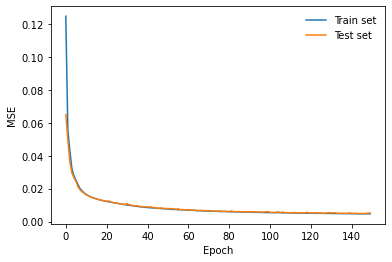

In [170]:
plt.plot(history.history['loss'], label = 'Train set')
plt.plot(history.history['val_loss'], label = 'Test set')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(frameon=False)

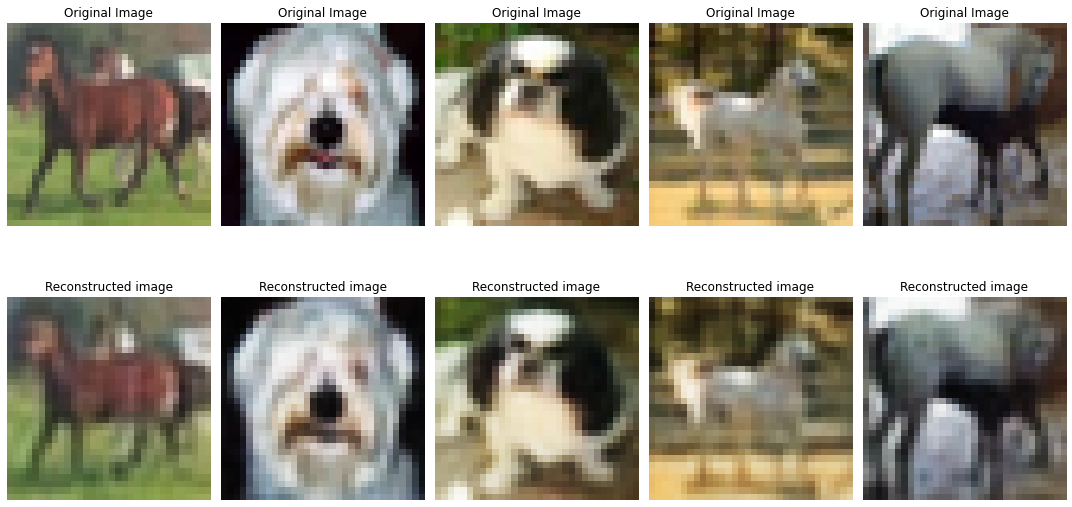

In [171]:
fig, axes = plt.subplots(2,5, figsize=(15,15))

for i in range(5):
    ix = np.random.choice(len(X3c_normelized))
    reconstruct_image = autoencoder.predict(X3c_normelized[ix:ix+1,...])[0]
    axes[1,i].imshow( (1+reconstruct_image) /2 )
    axes[1,i].axis('off')
    axes[1,i].set_title('Reconstructed image')
    axes[0,i].imshow((X3c_normelized[ix:ix+1,...][0]+ 1) /2)
    axes[0,i].axis('off')
    axes[0,i].set_title('Original Image')
fig.tight_layout(h_pad=-30)

Looking over the loss value, along with the images themselves, exhibits that the autoencoder provides sufficient results. That means that the encoding procedure provides enough information, which is compressed into 512 dimensions,  to reconstruct the image during the decoding path.

Now, we can apply clustering techniques over the latent space of 512 dimensions, which represent the compressed image's information.

In [172]:
X3c_encoded = encoder.predict(X3c_normelized)
print("X3c_encoded dims:", np.shape(X3c_encoded))

X3c_encoded dims: (18000, 512)


#### 2.2.1) K-Means Method + Autoencoder

In [173]:
kmeansAuto  = KMeans(n_clusters = 3,verbose = 1, max_iter=500, tol=0.000001)
# Train the model:
kmeansAuto.fit(X3c_encoded) 

Initialization complete
Iteration 0, inertia 4060588.5
Iteration 1, inertia 2124813.75
Iteration 2, inertia 2077464.5
Iteration 3, inertia 2065234.375
Iteration 4, inertia 2054662.625
Iteration 5, inertia 2046122.0
Iteration 6, inertia 2039902.75
Iteration 7, inertia 2036313.25
Iteration 8, inertia 2034645.0
Iteration 9, inertia 2034070.5
Iteration 10, inertia 2033894.875
Iteration 11, inertia 2033841.25
Iteration 12, inertia 2033830.125
Iteration 13, inertia 2033826.75
Iteration 14, inertia 2033816.375
Iteration 15, inertia 2033813.5
Iteration 16, inertia 2033813.625
Iteration 17, inertia 2033818.0
Iteration 18, inertia 2033817.625
Iteration 19, inertia 2033819.125
Iteration 20, inertia 2033820.125
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 4151672.25
Iteration 1, inertia 2068608.375
Iteration 2, inertia 2047836.375
Iteration 3, inertia 2040446.5
Iteration 4, inertia 2036660.625
Iteration 5, inertia 2034756.875
Iteration 6, inertia 2034

Iteration 17, inertia 2033905.625
Iteration 18, inertia 2033874.875
Iteration 19, inertia 2033860.5
Iteration 20, inertia 2033849.875
Iteration 21, inertia 2033840.5
Iteration 22, inertia 2033833.25
Iteration 23, inertia 2033827.375
Iteration 24, inertia 2033830.25
Iteration 25, inertia 2033826.5
Iteration 26, inertia 2033825.25
Iteration 27, inertia 2033817.75
Iteration 28, inertia 2033823.375
Iteration 29, inertia 2033821.375
Iteration 30, inertia 2033820.625
Iteration 31, inertia 2033821.125
Iteration 32, inertia 2033823.5
Iteration 33, inertia 2033823.375
Iteration 34, inertia 2033821.625
Iteration 35, inertia 2033811.625
Iteration 36, inertia 2033811.375
Iteration 37, inertia 2033812.75
Iteration 38, inertia 2033814.5
Iteration 39, inertia 2033820.375
Converged at iteration 39: strict convergence.
Initialization complete
Iteration 0, inertia 3234063.25
Iteration 1, inertia 2163801.75
Iteration 2, inertia 2121409.25
Iteration 3, inertia 2103306.25
Iteration 4, inertia 2092034.5
Ite

KMeans(max_iter=500, n_clusters=3, tol=1e-06, verbose=1)

In [174]:

Y_clustered_Auto = kmeansAuto.labels_

# Silhouette Score (The average of all the points)
#Close to 1 -> Good assignment of a point to its cluster
#Close to 0 -> Assignment of a point to the borderline of two clusters
#Close to -1 -> Bad assignment of a point to its cluster

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", metrics.silhouette_score(X3c_encoded, Y_clustered_Auto)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_encoded, Y_clustered_Auto)) 


Silhouette Score (mean Silhouette Coefficient over all samples):  0.089234486
Davies-Bounding index:  2.63828790000581


In [175]:
np.unique(Y_clustered_Auto)

array([0, 1, 2])

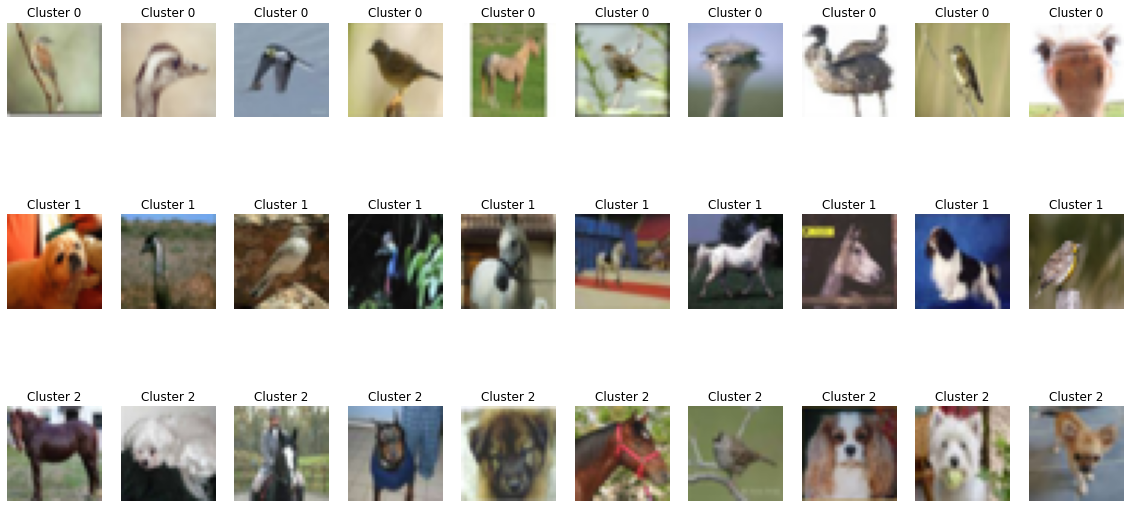

In [176]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_clustered_Auto  == i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [177]:
X3c = np.array(((X3c_normelized+1)*0.5) * 255)
X3c = X3c.astype(np.uint8)


In [178]:

lab0 = color.rgb2lab(X3c[Y_clustered_Auto == 0])
lab1 = color.rgb2lab(X3c[Y_clustered_Auto == 1])
lab2 = color.rgb2lab(X3c[Y_clustered_Auto == 2])

print("Average lightness of cluster 0: ","Average Value: ",np.round(np.mean(lab0[:,:,:,0])),
      " Min Value: ", np.round(np.min(np.mean(lab0[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab0[:,:,:,0], axis = 0))),", Num of images in the set: ", len(lab0[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_Auto ==0]==0)," #Dog:" , sum(Y3c[Y_clustered_Auto ==0]==1) , " #horse:", sum(Y3c[Y_clustered_Auto ==0]==2),
"\nAverage lightness of cluster 1: ", "Average Value: ", np.round(np.mean(lab1[:,:,:,0])),
      " Min Value: " ,np.round(np.min(np.mean(lab1[:,:,:,0], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(lab1[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab1[:,:,:,0]),
      "\n#Birds:" , sum(Y3c[Y_clustered_Auto ==1]==0)," #Dog:" , sum(Y3c[Y_clustered_Auto ==1]==1) , " #horse:", sum(Y3c[Y_clustered_Auto ==1]==2),
"\nAverage lightness of cluster 2: ", "Average Value: " ,np.round(np.mean(lab2[:,:,:,0]))
      ," Min Value: ", np.round(np.min(np.mean(lab2[:,:,:,0], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(lab2[:,:,:,0], axis = 0))), ", Num of images in the set: ", len(lab2[:,:,:,0]),
     "\n#Birds:" , sum(Y3c[Y_clustered_Auto ==2]==0)," #Dog:" , sum(Y3c[Y_clustered_Auto ==2]==1) , " #horse:", sum(Y3c[Y_clustered_Auto ==2]==2))

Average lightness of cluster 0:  Average Value:  67.0  Min Value:  51.0 Max Value:  76.0 , Num of images in the set:  3403 
#Birds: 1362  #Dog: 1039  #horse: 1002 
Average lightness of cluster 1:  Average Value:  36.0  Min Value:  30.0 Max Value:  43.0 , Num of images in the set:  4644 
#Birds: 1633  #Dog: 1685  #horse: 1326 
Average lightness of cluster 2:  Average Value:  52.0  Min Value:  45.0 Max Value:  56.0 , Num of images in the set:  9953 
#Birds: 3005  #Dog: 3276  #horse: 3672


Let's check if there is a priority to some class (animal) in each cluster. 


In [180]:
for i in range(3):
    birds = sum(Y3c[Y_clustered_Auto ==i]==0)
    dogs = sum(Y3c[Y_clustered_Auto ==i]==1)
    horses = sum(Y3c[Y_clustered_Auto ==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 40.0%, Dog - 30.5%, horse - 29.4%
Cluster 1: Birds - 35.2%, Dog - 36.3%, horse - 28.6%
Cluster 2: Birds - 30.2%, Dog - 32.9%, horse - 36.9%


As we can see, similar to KMeans withput PCA, PCA-KMeans also provide clustering based on image properties.
There is no priority of 

#### 2.2.1) Hierarchical Clustering (HC) Method + AutoEncoder

In [181]:
hcAuto = AgglomerativeClustering(n_clusters=3 ,affinity= 'euclidean') #Hierarchical Clustering

# Train the model:
hcAuto.fit(X3c_encoded)
Y_hc_Auto = hcAuto.labels_
print(np.unique(Y_hc_Auto))


[0 1 2]


In [182]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_encoded,Y_hc_Auto)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_encoded, Y_hc_Auto)) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.049545515
Davies-Bounding index:  3.1839495308559527


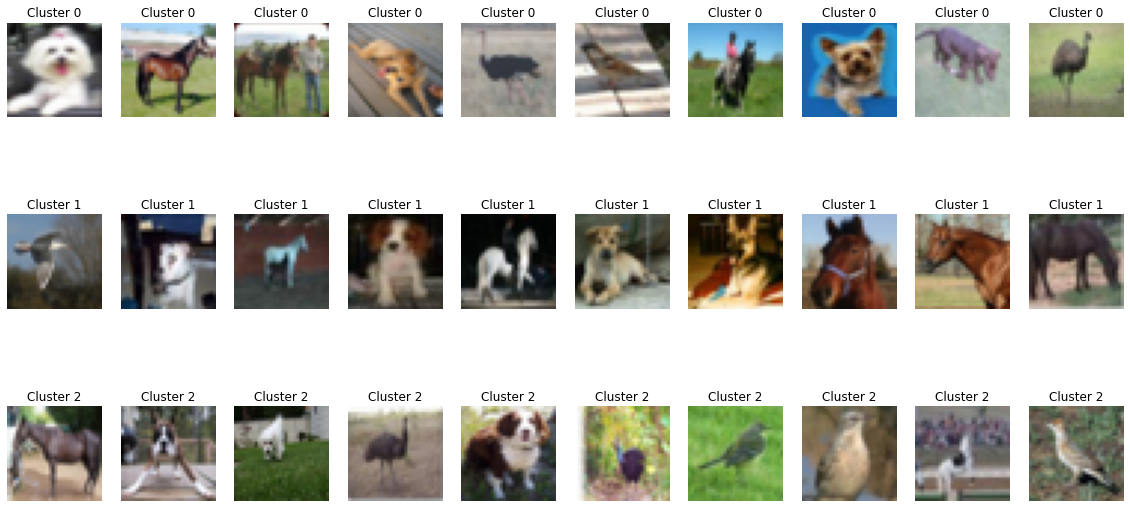

In [183]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_hc_Auto  == i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [184]:

g0 = rgb2gray(X3c[ Y_hc_Auto == 0])
g1 = rgb2gray(X3c[ Y_hc_Auto == 1])
g2 = rgb2gray(X3c[ Y_hc_Auto == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(g0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(g0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g0[:,:,:], axis = 0))),", Num of images in the set: ", len(g0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Auto==0]==0)," #Dog:" , sum(Y3c[Y_hc_Auto==0]==1) , " #horse:", sum(Y3c[Y_hc_Auto==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(g1[:,:,:])),
      " Min Value: " ,np.round(np.min(np.mean(g1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(g1[:,:,:], axis = 0))), ", Num of images in the set: ", len(g1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_hc_Auto==1]==0)," #Dog:" , sum(Y3c[Y_hc_Auto==1]==1) , " #horse:", sum(Y3c[Y_hc_Auto==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(g2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(g2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(g2[:,:,:], axis = 0))), ", Num of images in the set: ", len(g2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_hc_Auto==2]==0)," #Dog:" , sum(Y3c[Y_hc_Auto==2]==1) , " #horse:", sum(Y3c[Y_hc_Auto==2]==2))

Average brightness of cluster 0:  Average Value:  151.0  Min Value:  120.0 Max Value:  175.0 , Num of images in the set:  5716 
#Birds: 1899  #Dog: 1793  #horse: 2024 
Average brightness of cluster 1:  Average Value:  88.0  Min Value:  69.0 Max Value:  108.0 , Num of images in the set:  4463 
#Birds: 1585  #Dog: 1708  #horse: 1170 
Average brightness of cluster 2:  Average Value:  120.0  Min Value:  107.0 Max Value:  129.0 , Num of images in the set:  7821 
#Birds: 2516  #Dog: 2499  #horse: 2806


In [185]:
for i in range(3):
    birds = sum(Y3c[Y_hc_Auto==i]==0)
    dogs = sum(Y3c[Y_hc_Auto==i]==1)
    horses = sum(Y3c[Y_hc_Auto==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 33.2%, Dog - 31.4%, horse - 35.4%
Cluster 1: Birds - 35.5%, Dog - 38.3%, horse - 26.2%
Cluster 2: Birds - 32.2%, Dog - 32.0%, horse - 35.9%


#### 2.1.3) Gaussians Mixture (GM) Method  + Auto

In [186]:

gmAuto = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)

gmAuto.fit(X3c_encoded)

Y_gmAuto = gmAuto.predict(X3c_encoded)
print(np.unique(Y_gmAuto))


Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged: True
[0 1 2]


In [187]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_encoded,Y_gmAuto)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_encoded, Y_gmAuto )) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.031024238
Davies-Bounding index:  5.812469948659717


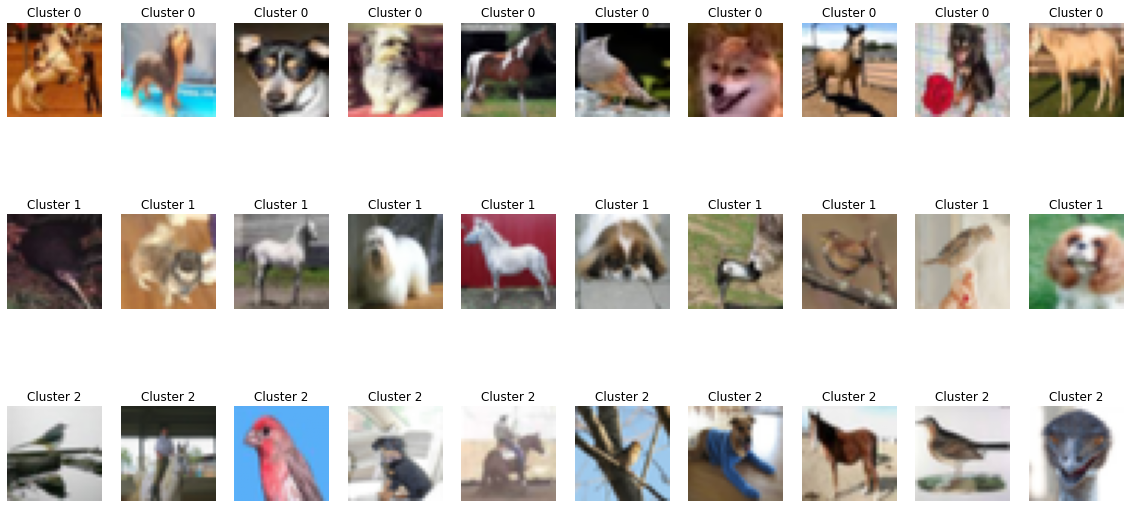

In [188]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_gmAuto   == i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [189]:
gm0 = rgb2gray(X3c[ Y_gmAuto == 0])
gm1 = rgb2gray(X3c[ Y_gmAuto == 1])
gm2 = rgb2gray(X3c[ Y_gmAuto == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[ Y_gmAuto==0]==0)," #Dog:" , sum(Y3c[ Y_gmAuto==0]==1) , " #horse:", sum(Y3c[ Y_gmAuto==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[ Y_gmAuto==1]==0)," #Dog:" , sum(Y3c[ Y_gmAuto==1]==1) , " #horse:", sum(Y3c[ Y_gmAuto==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[ Y_gmAuto==2]==0)," #Dog:" , sum(Y3c[ Y_gmAuto==2]==1) , " #horse:", sum(Y3c[ Y_gmAuto==2]==2))

Average brightness of cluster 0:  Average Value:  108.0  Min Value:  95.0 Max Value:  116.0 , Num of images in the set:  5575 
#Birds: 1388  #Dog: 2353  #horse: 1834 
Average brightness of cluster 1:  Average Value:  121.0  Min Value:  110.0 Max Value:  127.0 , Num of images in the set:  9346 
#Birds: 3838  #Dog: 2844  #horse: 2664 
Average brightness of cluster 2:  Average Value:  151.0  Min Value:  108.0 Max Value:  184.0 , Num of images in the set:  3079 
#Birds: 774  #Dog: 803  #horse: 1502


In [190]:
for i in range(3):
    birds = sum(Y3c[Y_gmAuto==i]==0)
    dogs = sum(Y3c[Y_gmAuto==i]==1)
    horses = sum(Y3c[Y_gmAuto==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 24.9%, Dog - 42.2%, horse - 32.9%
Cluster 1: Birds - 41.1%, Dog - 30.4%, horse - 28.5%
Cluster 2: Birds - 25.1%, Dog - 26.1%, horse - 48.8%


Here we can see that the integration of Autoencoder followed by GM method for clustering, yields a clustering that takes into account the object in the image as one of its main clustering features. As presented, clusters 1, 2, and 3, contain around 50% of the objects horse, birds, and dogs, respectively. 

#### 2.3) TSNE followed by GM and AutoEncoder (512) $\rightarrow$ TSNE (3) $\rightarrow$ GM (3)

Here we are going to try two techniques, the first one is going to be based on TSNE, which reduce the dimentionality into 3 dims, and the second going to combine Autoencoder and TSNE. The main idea behind the integration between Autoencoder followed by TSNE is to increase the distance between groups of different features and to decrease the gap inside each feature group (based on minimization of KL-divergence during the TSNE operation) followed by dimentionality reduction (into 3 dims).

In [191]:
from sklearn.manifold._t_sne import TSNE

tsne = TSNE(n_components = 3, init='random')

In [192]:
X3c_transformed_normelized = X3c_normelized.reshape(len(X3c),32*32*3)
print(X3c_transformed_normelized .shape)

(18000, 3072)


TSNE followed GM:

In [193]:
X3c_normelized_tsne = tsne.fit_transform(X3c_transformed_normelized)

In [194]:
gm_tsne = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)

gmAuto.fit(X3c_normelized_tsne)

Y_gm_tsne = gmAuto.predict(X3c_normelized_tsne)
print(np.unique(Y_gm_tsne ))

Initialization 0
Initialization converged: True
[0 1 2]


Let's check Silhouette Score and DB index

In [195]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_encoded,Y_gm_tsne )) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_normelized_tsne, Y_gm_tsne )) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.047461193
Davies-Bounding index:  1.2589752204784883


Let's take a look over some images at each clustter 

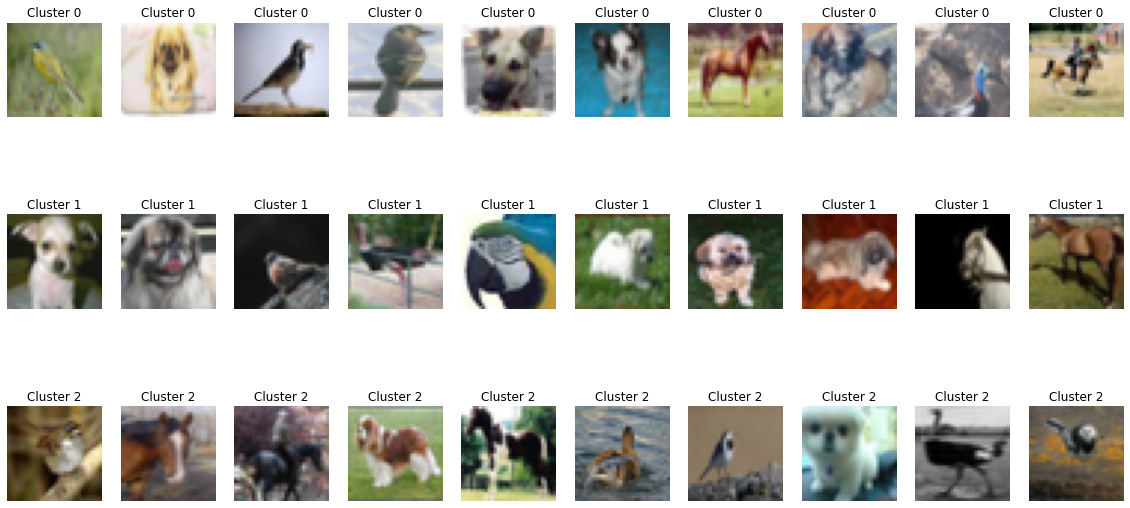

In [196]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_gm_tsne == i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [208]:
gm0 = rgb2gray(X3c[Y_gm_tsne == 0])
gm1 = rgb2gray(X3c[Y_gm_tsne == 1])
gm2 = rgb2gray(X3c[Y_gm_tsne == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm_tsne==0]==0)," #Dog:" , sum(Y3c[Y_gm_tsne==0]==1) , " #horse:", sum(Y3c[ Y_gm_tsne==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm_tsne==1]==0)," #Dog:" , sum(Y3c[Y_gm_tsne==1]==1) , " #horse:", sum(Y3c[Y_gm_tsne==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_gm_tsne==2]==0)," #Dog:" , sum(Y3c[Y_gm_tsne==2]==1) , " #horse:", sum(Y3c[Y_gm_tsne==2]==2))

Average brightness of cluster 0:  Average Value:  151.0  Min Value:  120.0 Max Value:  164.0 , Num of images in the set:  5244 
#Birds: 2070  #Dog: 1809  #horse: 1365 
Average brightness of cluster 1:  Average Value:  99.0  Min Value:  68.0 Max Value:  122.0 , Num of images in the set:  6770 
#Birds: 1927  #Dog: 2916  #horse: 1927 
Average brightness of cluster 2:  Average Value:  122.0  Min Value:  90.0 Max Value:  165.0 , Num of images in the set:  5986 
#Birds: 2003  #Dog: 1275  #horse: 2708


In [209]:
for i in range(3):
    birds = sum(Y3c[Y_gm_tsne==i]==0)
    dogs = sum(Y3c[Y_gm_tsne==i]==1)
    horses = sum(Y3c[Y_gm_tsne==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 39.5%, Dog - 34.5%, horse - 26.0%
Cluster 1: Birds - 28.5%, Dog - 43.1%, horse - 28.5%
Cluster 2: Birds - 33.5%, Dog - 21.3%, horse - 45.2%


Now let's see the results given by AutoEncoder followed by TSNE and GM

In [197]:
tsne = TSNE(n_components = 3, init='random')
X3c_transformed_normelized =X3c_encoded # X3c_normelized.reshape(len(X3c),32*32*3) # normelized to -1....1
#X3c_transformed_normelized = np.concatenate((np.random.normal(0,size = (100,3)),
 #                                             np.random.normal(10,size = (100,3)),
  #                                             np.random.normal(20,size = (100,3))
   #                                         ),axis = 0)
                                            

In [198]:
X3c_transformed_normelized.shape

(18000, 512)

In [199]:
X3c_normelized_Auto_tsne = tsne.fit_transform(X3c_transformed_normelized)

Let's try to see if we can visualize it by using only the first two dimensions

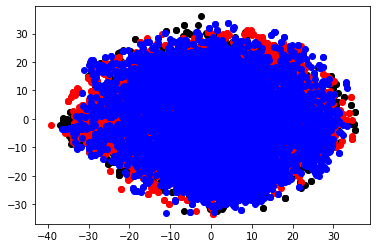

In [200]:
plt.scatter(X3c_normelized_Auto_tsne[:,0][Y3c == 0], X3c_normelized_Auto_tsne[:,1][Y3c == 0], color = 'k')
plt.scatter(X3c_normelized_Auto_tsne[:,0][Y3c == 1], X3c_normelized_Auto_tsne[:,1][Y3c == 1], color = 'r')
plt.scatter(X3c_normelized_Auto_tsne[:,0][Y3c == 2], X3c_normelized_Auto_tsne[:,1][Y3c == 2], color = 'b')

In [201]:

gmAuto = mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)

gmAuto.fit(X3c_normelized_Auto_tsne)

Y_gmAuto_tsne = gmAuto.predict(X3c_normelized_Auto_tsne)
print(np.unique(Y_gmAuto_tsne))


Initialization 0
Initialization converged: True
[0 1 2]


In [202]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_normelized_Auto_tsne, Y_gmAuto_tsne)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_normelized_Auto_tsne, Y_gmAuto_tsne )) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.26605928
Davies-Bounding index:  1.3063978520388098


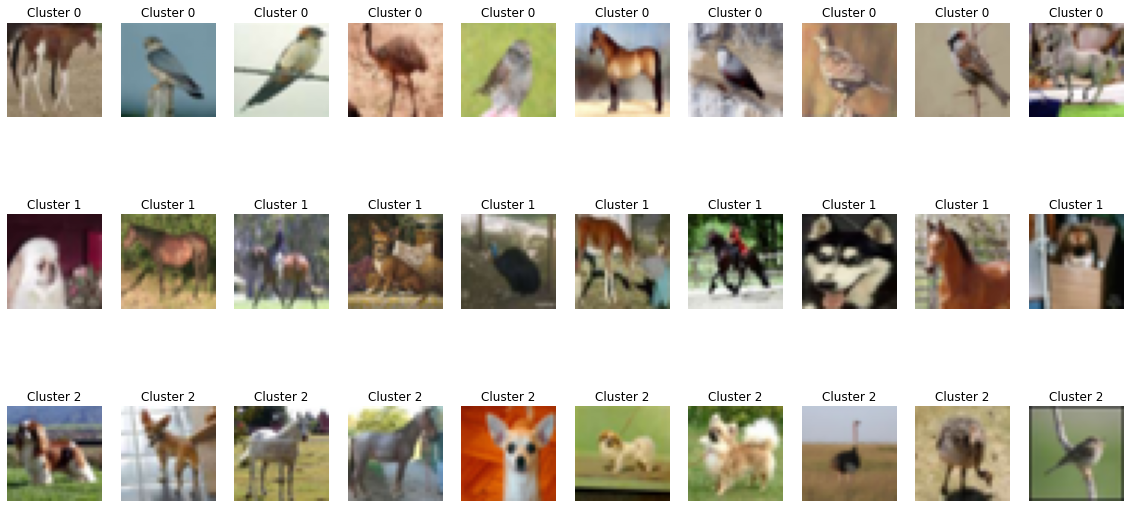

In [203]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_gmAuto_tsne== i]
    X_class = (X_class+1)/2
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [204]:

gm0 = rgb2gray(X3c[Y_gmAuto_tsne == 0])
gm1 = rgb2gray(X3c[Y_gmAuto_tsne == 1])
gm2 = rgb2gray(X3c[Y_gmAuto_tsne == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gmAuto_tsne==0]==0)," #Dog:" , sum(Y3c[ Y_gmAuto_tsne==0]==1) , " #horse:", sum(Y3c[ Y_gmAuto_tsne==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gmAuto_tsne==1]==0)," #Dog:" , sum(Y3c[Y_gmAuto_tsne==1]==1) , " #horse:", sum(Y3c[Y_gmAuto_tsne==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[Y_gmAuto_tsne==2]==0)," #Dog:" , sum(Y3c[Y_gmAuto_tsne==2]==1) , " #horse:", sum(Y3c[Y_gmAuto_tsne==2]==2))

Average brightness of cluster 0:  Average Value:  147.0  Min Value:  121.0 Max Value:  159.0 , Num of images in the set:  6316 
#Birds: 2260  #Dog: 2344  #horse: 1712 
Average brightness of cluster 1:  Average Value:  95.0  Min Value:  76.0 Max Value:  114.0 , Num of images in the set:  6263 
#Birds: 1952  #Dog: 2382  #horse: 1929 
Average brightness of cluster 2:  Average Value:  123.0  Min Value:  104.0 Max Value:  158.0 , Num of images in the set:  5421 
#Birds: 1788  #Dog: 1274  #horse: 2359


In [205]:
for i in range(3):
    birds = sum(Y3c[Y_gmAuto_tsne==i]==0)
    dogs = sum(Y3c[Y_gmAuto_tsne==i]==1)
    horses = sum(Y3c[Y_gmAuto_tsne==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 35.8%, Dog - 37.1%, horse - 27.1%
Cluster 1: Birds - 31.2%, Dog - 38.0%, horse - 30.8%
Cluster 2: Birds - 33.0%, Dog - 23.5%, horse - 43.5%


### 2.2) Dimentionality reduction / feature extraction followed by GM based on classification network

This technique is only theoretical for study purposes, and it is not possible in real scenarios, because there is no common sense of doing clustering if we already have the labels. In other words, most of the time the clustering will be performed on unlabeled data.

In [226]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense,Flatten
from tensorflow.keras.optimizers import SGD
x_input = tf.keras.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',
                           input_shape=(32, 32, 3))(x_input)
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)
y_hat = Dense(3, activation='softmax')(x)

opt = SGD(lr=0.001, momentum=0.9)


In [227]:
model = tf.keras.Model(inputs=x_input, outputs= y_hat)

In [228]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        369

In [229]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [230]:
X3c_normelized =  (X3c_original / 255.0)  
X3c_normelized, Y3c = shuffle(X3c_normelized, Y3c_original)
n = int(len(X3c_normelized) * 0.80) 
x_train = X3c_normelized[:n, ...]
y_train = Y3c[:n]
x_test = X3c_normelized[n:,...]
y_test = Y3c[n:]


history = model.fit(x_train, y_train, epochs=200, batch_size=64, validation_data=(x_test, y_test))

Train on 14400 samples, validate on 3600 samples
Epoch 1/200
14400/14400 [==============================] - 9s 631us/sample - loss: 1.0899 - accuracy: 0.3927 - val_loss: 1.0452 - val_accuracy: 0.5161
Epoch 2/200
14400/14400 [==============================] - 8s 522us/sample - loss: 1.0404 - accuracy: 0.4706 - val_loss: 1.0177 - val_accuracy: 0.5122
Epoch 3/200
14400/14400 [==============================] - 8s 524us/sample - loss: 1.0089 - accuracy: 0.5130 - val_loss: 0.9685 - val_accuracy: 0.5772
Epoch 4/200
14400/14400 [==============================] - 8s 524us/sample - loss: 0.9727 - accuracy: 0.5624 - val_loss: 0.9978 - val_accuracy: 0.5211
Epoch 5/200
14400/14400 [==============================] - 7s 519us/sample - loss: 0.9526 - accuracy: 0.5792 - val_loss: 0.9179 - val_accuracy: 0.6272
Epoch 6/200
14400/14400 [==============================] - 7s 520us/sample - loss: 0.9375 - accuracy: 0.5986 - val_loss: 0.8970 - val_accuracy: 0.6439
Epoch 7/200
14400/14400 [====================

14400/14400 [==============================] - 7s 515us/sample - loss: 0.6948 - accuracy: 0.8543 - val_loss: 0.7005 - val_accuracy: 0.8469
Epoch 108/200
14400/14400 [==============================] - 7s 511us/sample - loss: 0.6946 - accuracy: 0.8521 - val_loss: 0.7045 - val_accuracy: 0.8406
Epoch 109/200
14400/14400 [==============================] - 7s 517us/sample - loss: 0.6948 - accuracy: 0.8551 - val_loss: 0.7130 - val_accuracy: 0.8322
Epoch 110/200
14400/14400 [==============================] - 7s 517us/sample - loss: 0.6937 - accuracy: 0.8556 - val_loss: 0.7060 - val_accuracy: 0.8403
Epoch 111/200
14400/14400 [==============================] - 7s 518us/sample - loss: 0.6916 - accuracy: 0.8579 - val_loss: 0.7010 - val_accuracy: 0.8431
Epoch 112/200
14400/14400 [==============================] - 7s 520us/sample - loss: 0.6921 - accuracy: 0.8568 - val_loss: 0.7032 - val_accuracy: 0.8428
Epoch 113/200
14400/14400 [==============================] - 8s 522us/sample - loss: 0.6917 - ac

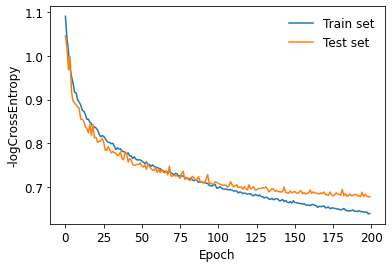

In [231]:
plt.plot(history.history['loss'], label = 'Train set')
plt.plot(history.history['val_loss'], label = 'Test set')
plt.ylabel('-logCrossEntropy')
plt.xlabel('Epoch')
plt.legend(frameon=False)

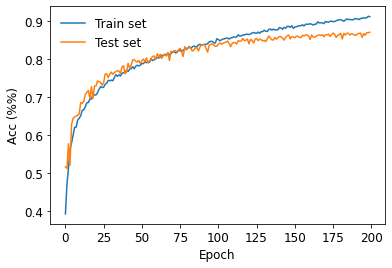

In [232]:
plt.plot(history.history['accuracy'], label = 'Train set')
plt.plot(history.history['val_accuracy'], label = 'Test set')
plt.ylabel('Acc (%%)')
plt.xlabel('Epoch')
plt.legend(frameon=False)

In [233]:
extract = tf.keras.Model(model.inputs, model.layers[-2].output)

In [234]:
X3c_normelized_features = extract.predict(X3c_normelized)

In [235]:
X3c_normelized_features.shape

(18000, 128)

In [236]:
gm_model_class= mixture.GaussianMixture(n_components= 3, covariance_type='full', tol=0.001, reg_covar=1e-06,
                                    max_iter=100, n_init=1, init_params='kmeans',
                                    verbose= 1, verbose_interval=10)

gm_model_class.fit(X3c_normelized_features)

Y_gm_model_class = gm_model_class.predict(X3c_normelized_features)
print(np.unique(Y_gm_model_class))

Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True
[0 1 2]


In [237]:

print("Silhouette Score (mean Silhouette Coefficient over all samples): ", 
      metrics.silhouette_score(X3c_normelized_features, Y_gm_model_class)) 

#  Davies-Bounding index: lower value better clusterring 
print("Davies-Bounding index: ", metrics.davies_bouldin_score(X3c_normelized_features, Y_gm_model_class )) 

Silhouette Score (mean Silhouette Coefficient over all samples):  0.19609267
Davies-Bounding index:  1.5700144478211362


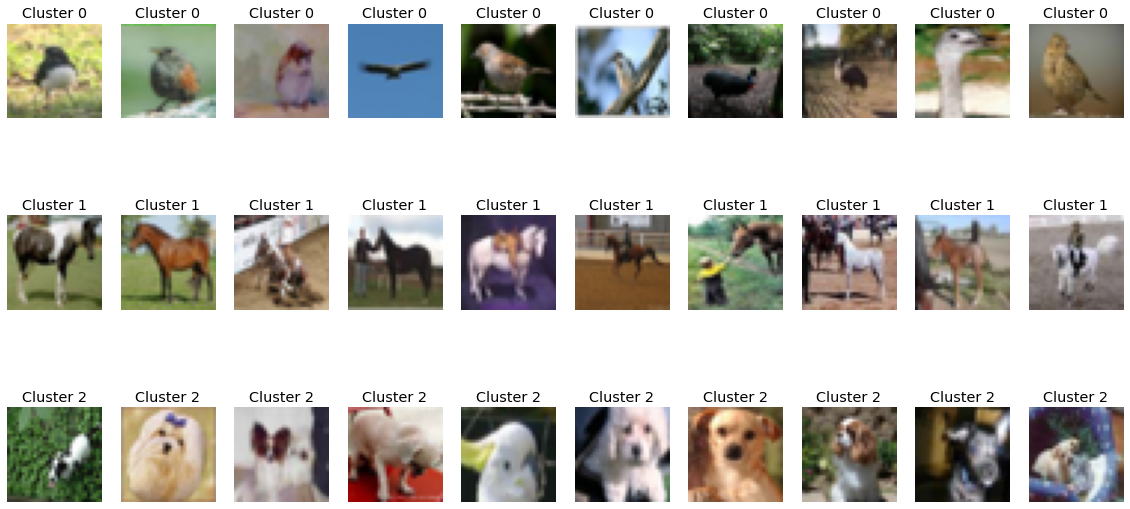

In [238]:
num_of_images = 10
fig, axes = plt.subplots(3,num_of_images,figsize=(20,10))
for i in range(3):
    X_class = X3c_normelized[Y_gm_model_class == i]
    
    for j in range(num_of_images):
        random_num = np.random.choice(len(X_class))
        image = X_class[random_num]
        #print(image.shape)
        axes[i, j].imshow(image)
        axes[i,j].set_title('Cluster ' + str(i))
        axes[i,j].axis('off')

#fig.tight_layout()

In [239]:

gm0 = rgb2gray(X3c[ Y_gm_model_class == 0])
gm1 = rgb2gray(X3c[ Y_gm_model_class == 1])
gm2 = rgb2gray(X3c[ Y_gm_model_class == 2])
print("Average brightness of cluster 0: ","Average Value: ",np.round(np.mean(gm0[:,:,:])),
      " Min Value: ", np.round(np.min(np.mean(gm0[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm0[:,:,:], axis = 0))),", Num of images in the set: ", len(gm0[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm_model_class==0]==0)," #Dog:" , sum(Y3c[ Y_gm_model_class==0]==1) , " #horse:", sum(Y3c[ Y_gm_model_class==0]==2),
"\nAverage brightness of cluster 1: ", "Average Value: ", np.round(np.mean(gm1[:,:,:])),
      
      " Min Value: " ,np.round(np.min(np.mean(gm1[:,:,:], axis =0))),
      "Max Value: ",  np.round(np.max(np.mean(gm1[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm1[:,:,:]),
      "\n#Birds:" , sum(Y3c[Y_gm_model_class==1]==0)," #Dog:" , sum(Y3c[ Y_gm_model_class==1]==1) , " #horse:", sum(Y3c[Y_gm_model_class==1]==2),
"\nAverage brightness of cluster 2: ", "Average Value: " ,np.round(np.mean(gm2[:,:,:]))
      ," Min Value: ", np.round(np.min(np.mean(gm2[:,:,:], axis =0))),
      "Max Value: ", np.round(np.max(np.mean(gm2[:,:,:], axis = 0))), ", Num of images in the set: ", len(gm2[:,:,:]),
     "\n#Birds:" , sum(Y3c[ Y_gm_model_class==2]==0)," #Dog:" , sum(Y3c[ Y_gm_model_class==2]==1) , " #horse:", sum(Y3c[Y_gm_model_class==2]==2))

Average brightness of cluster 0:  Average Value:  123.0  Min Value:  110.0 Max Value:  129.0 , Num of images in the set:  5507 
#Birds: 5122  #Dog: 256  #horse: 129 
Average brightness of cluster 1:  Average Value:  122.0  Min Value:  111.0 Max Value:  130.0 , Num of images in the set:  5249 
#Birds: 104  #Dog: 145  #horse: 5000 
Average brightness of cluster 2:  Average Value:  122.0  Min Value:  111.0 Max Value:  131.0 , Num of images in the set:  7244 
#Birds: 774  #Dog: 5599  #horse: 871


In [240]:
for i in range(3):
    birds = sum(Y3c[ Y_gm_model_class==i]==0)
    dogs = sum(Y3c[ Y_gm_model_class==i]==1)
    horses = sum(Y3c[ Y_gm_model_class==i]==2)
    total = birds + dogs + horses
    print("Cluster %i: Birds - %.1f%%, Dog - %.1f%%, horse - %.1f%%" % (i, birds/total*100,dogs/total*100,horses/total*100))


Cluster 0: Birds - 93.0%, Dog - 4.6%, horse - 2.3%
Cluster 1: Birds - 2.0%, Dog - 2.8%, horse - 95.3%
Cluster 2: Birds - 10.7%, Dog - 77.3%, horse - 12.0%


### Part 2 Results, Discussion and Conclusions:

#### Results and Discussion:

### PCA followed by all three clusstering methods (bsed on 90% of the data information, 1101 dims)

#### Results:
1) PCA+KMeans - Silhouette Score (mean Silhouette Coefficient over all samples):  0.089, Davies-Bounding index:  2.63 - explained by lightness

Cluster 0: Birds - 31.9%, Dog - 27.5%, horse - 40.6%, (total images: 7650), Average lightness value: 52.0 <br>
Cluster 1: Birds - 30.9%, Dog - 41.6%, horse - 27.5%, (total images: 6766), Average lightness value: 41.0<br>
Cluster 2: Birds - 41.0%, Dog - 30.3%, horse - 28.7%, (total images: 3584), Average lightness value: 67.0

2) PCA+HC - Silhouette Score (mean Silhouette Coefficient over all samples):  0.058, Davies-Bounding index:  2.83 - explained by brightness

Cluster 0: Birds - 35.4%, Dog - 26.1%, horse - 38.5%, (total imgaes: 6661), Average brightness value: 145.0 <br>
Cluster 1: Birds - 29.1%, Dog - 38.4%, horse - 32.5%, (total imgaes: 8258), Average brightness value: 118.0<br>
Cluster 2: Birds - 40.1%, Dog - 35.4%, horse - 24.4%, (total imgaes: 3081), Average brightness value: 82.0

3) PCA+GM - Silhouette Score (mean Silhouette Coefficient over all samples):  0.021, Davies-Bounding index:  5.255 - explained by brightness

Cluster 0: Birds - 23.6%, Dog - 25.7%, horse - 50.6%, (total images: 5341), Average brightness value: 124.0 <br>
Cluster 1: Birds - 29.9%, Dog - 39.2%, horse - 30.9%, (total images: 5690), Average brightness value: 102.0 <br>
Cluster 2: Birds - 43.6%, Dog - 34.4%, horse - 22.1%, (total images: 6969), Average brightness value: 136.0

#### Discussion:
In comparison to the previous technique, dimensionality reduction using PCA technique followed by the clustering method did not yield any segnificat new result or conclusion, except for the acceleration of the computational time of all three clustering techniques examines here, and that is due to the fact of computation over lower dimensionality representation.

Moreover,  it can be noticed that the combination of PCA+GM and PCA+HC, exhibits more equal separation into 3 clusters. It can be explained by the fact that reducing the last significant 10% of the data, which is performed by taking only 90% of the cumulative variance, reduces the similarity between classes along with the image noise.



### Autoencoder followed by all three clusstering methods (latent space 512)

#### Results:
1) Auto+KMeans - Silhouette Score (mean Silhouette Coefficient over all samples):  0.090, Davies-Bounding index:  2.64 - explained by lightness

Cluster 0: Birds - 40.0%, Dog - 30.5%, horse - 29.4%, (total images: 3403), Average lightness value: 67.0 <br>
Cluster 1: Birds - 35.2%, Dog - 36.3%, horse - 28.6%, (total images: 4644), Average lightness value: 36.0 <br>
Cluster 2: Birds - 30.2%, Dog - 32.9%, horse - 36.9%, (total images: 9953), Average lightness value: 52.0 <br>

2) Auto+HC - Silhouette Score (mean Silhouette Coefficient over all samples):  0.050, Davies-Bounding index:  3.18 - explained by brightness

Cluster 0: Birds - 33.2%, Dog - 31.4%, horse - 35.4%, (total imgaes: 6661), Average brightness value: 151.0 <br>
Cluster 1: Birds - 35.5%, Dog - 38.3%, horse - 26.2%, (total imgaes: 4463), Average brightness value: 88.0 <br>
Cluster 2: Birds - 32.2%, Dog - 32.0%, horse - 35.9%, (total imgaes: 7821), Average brightness value: 120.0 <br>
    
3) Auto+GM - Silhouette Score (mean Silhouette Coefficient over all samples):  0.031, Davies-Bounding index:  5.81 - explained by brightness

Cluster 0: Birds - 24.9%, Dog - 42.2%, horse - 32.9%, (total imgaes: 5575), Average brightness value: 108.0 <br>
Cluster 1: Birds - 41.1%, Dog - 30.4%, horse - 28.5%, (total imgaes: 9346), Average brightness value: 121.0 <br>
Cluster 2: Birds - 25.1%, Dog - 26.1%, horse - 48.8%, (total imgaes: 3079), Average brightness value: 151.0 <br>

#### Discussion:

Autoencoder followed by all three clustering techniques presents very similar results given by PCA followed by the clustering methods. This result should not be surprising due to the similar goal of PCA and autoencoders in our case. Both techniques were used as dimensionality reduction mechanisms in our examination. Even though PCA has more informative details and theoretical math behind it, autoencoder considers better when we wish to compress with less lost information. To conclude, for our goal both techniques present similar achievements.       

### TSNE followed GM Vs. Autoencoder(512 dims) $\rightarrow$ TSNE(3 dims) followed GM 

#### Results:
1) TSNE + GM - Silhouette Score (mean Silhouette Coefficient over all samples):  0.047, Davies-Bounding index:  1.26 - explained by lightness

Cluster 0: Birds - 39.5%, Dog - 34.5%, horse - 26.0%, (total images: 5244), Average lightness value: 151.0 <br>
Cluster 1: Birds - 28.5%, Dog - 43.1%, horse - 28.5%, (total images: 6770), Average lightness value: 99.0 <br>
Cluster 2: Birds - 33.5%, Dog - 21.3%, horse - 45.2%, (total images: 5986), Average lightness value: 122.0 <br>


2) Autoencoder(512) -> TSNE(3) -> GM: Silhouette Score (mean Silhouette Coefficient over all samples):  0.266, Davies-Bounding index:  1.3 - explained by lightness

Cluster 0: Birds - 35.8%, Dog - 37.1%, horse - 27.1%, (total images: 6316), Average lightness value: 147.0 <br>
Cluster 1: Birds - 31.2%, Dog - 38.0%, horse - 30.8%, (total images: 6263), Average lightness value: 95.0 <br>
Cluster 2: Birds - 33.0%, Dog - 23.5%, horse - 43.5%, (total images: 5421), Average lightness value: 123.0 <br>

#### Discussion:

Autoencoder followed by TSNE and GM, exhibits the best metrics values for clustering compared to all techniques examined here, with values of 1.3 and 0.266 for Silhouette coefficient, and Davies-Bounding index, respectively. It can be explained by the loss function of TSNE algorithm, which encourages dense clusters and higher distances between different clusters. It must be mentioned that this technique is not useful since it is extremely computationally expensive and must be recalculated every time we want to perform clustering over a new sample. 

TSNE followed by GM seems to work fine, but the computation cost over high dimensionality, along with requiring recalculation every time we get a new sample makes this technique impractical. 

###  Dimentionality reduction / feature extraction followed by GM, based on classification network

#### Results:

Feature extraction (128 dims)-> GM: Silhouette Score (mean Silhouette Coefficient over all samples):  0.196, Davies-Bounding index:  1.57 - explained by lightness

Cluster 0: Birds - 93.0%, Dog - 4.6%, horse - 2.3%, (total images: 5507), Average lightness value: 123.0 <br>
Cluster 1: Birds - 2.0%, Dog - 2.8%, horse - 95.3%, (total images: 5249), Average lightness value: 122.0 <br>
Cluster 2: Birds - 10.7%, Dog - 77.3%, horse - 12.0%, (total images: 7244), Average lightness value: 122.0 <br>

#### Discussion:

Since it is impossible to performe this kind of technique in real senerio, then the values given by the examined metrics are incompatible to the values given by all the other techniques presented above. 

The results exhibit a strong correlation between the cluster and the animal presented in the image, over 90% of clusters 0 and 1 and 77% of cluster 2, are images of Birds, horses, and dogs, respectively. It can be explained by the fact that we extract features from the net that were trained on performing classification. In other words, we extract features which train to represente as a certain type of clustering, based on the given label/animal.   

### Summary

When dealing with images and the classical approach of the clustering technique, we should be not surprised if the clustering main feature will be one of the image properties, such as brightness, contrast, lightness, and sharpness.

Based on all models presented above for clustering three classes out of 10 classes from CIFAR10, the technique with the best Silhouette Score and Davies-Bounding index, without considering the last approach of extracting features from classification network, is Autoencoder followed by KMeans, with values of 0.09 and 2.64, respectively.